In [1]:
# Importing required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import string
import nltk 
import re
import contractions
from nltk.corpus import stopwords

In [2]:
df_train=pd.read_csv('malignant_train.csv')

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# Overviewing Dataset

In [ ]:
df_train.head(20)

In [ ]:
df_train.info()

In [5]:
df_train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [6]:
df_train.shape

(159571, 8)

# Checking Null Values

In [7]:
df_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

# Preprocessing

In [4]:
# Making a copy of dataset
df1=df_train.copy()

In [5]:
# Converting text to lowercase
df1['comment_text']=df1['comment_text'].str.lower()

In [ ]:
df1.head(10)

In [6]:
# Creating a column to get length of each comment
df1['uncl_length']=df1['comment_text'].str.len()

In [ ]:
df1.head(10)

In [7]:
# Expanding Contracted words using Contractions Library

df1['comment_text'] = df1['comment_text'].apply(lambda x: [contractions.fix(word) for word in x.split()])

In [8]:
# Rejoining tokenized words to form string

df1['comment_text'] = [' '.join(map(str, text)) for text in df1['comment_text']]

In [ ]:
df1.head(10)

In [9]:
# Replace email addresses with 'email'
df1['comment_text'] = df1['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
df1['comment_text'] = df1['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df1['comment_text'] = df1['comment_text'].str.replace(r'£|\$', 'currencysymb')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df1['comment_text'] = df1['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

# Replace numbers with 'numbr'
df1['comment_text'] = df1['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [ ]:
df1.head(10)

In [10]:
# Removing Punctuation and other non-required characters if any

df1['comment_text']=df1['comment_text'].str.replace(r'[^\w\d\s]',' ')

In [ ]:
df1.head(10)

In [11]:
# Removing Stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df1['comment_text'] = df1['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [ ]:
df1.head(10)

Lemmatization

In [12]:
from nltk.stem import WordNetLemmatizer

lemma=WordNetLemmatizer()

In [13]:
# lemmatizing words
df1['comment_text'] = df1['comment_text'].apply(lambda x: ' '.join(lemma.lemmatize(word) for word in x.split()))

In [ ]:
df1.head(10)

In [14]:
# Creating a column to get comment length after cleaning

df1['cleaned_length']=df1['comment_text'].str.len()

In [ ]:
df1.head(10)

In [159]:
# Checking cleaned garbage text quantity

print(df1.uncl_length.sum())
print(df1.cleaned_length.sum())

print('************ \n')
print('Total Garbage Cleaned : ',df1.uncl_length.sum()-df1.cleaned_length.sum())
print('************ \n')
print('Total Garbage % : ',((df1.uncl_length.sum()-df1.cleaned_length.sum())/df1.uncl_length.sum())*100)

62893157
40081108
************ 

Total Garbage Cleaned :  22812049
************ 

Total Garbage % :  36.2711145188657


# Exploring Data

In [ ]:
columns=['malignant','highly_malignant','rude','threat','abuse','loathe']

Checking Counts

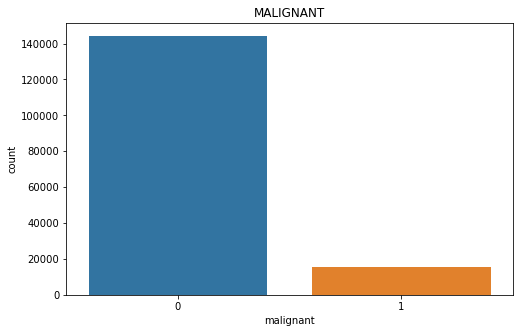

0    90.415552
1     9.584448
Name: malignant, dtype: float64


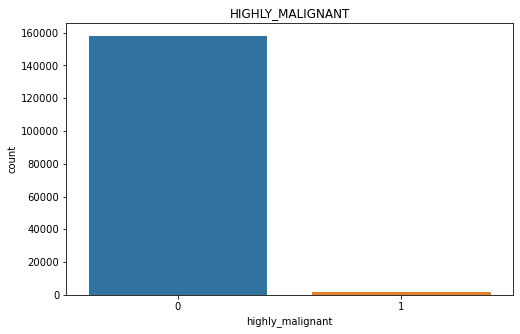

0    99.000445
1     0.999555
Name: highly_malignant, dtype: float64


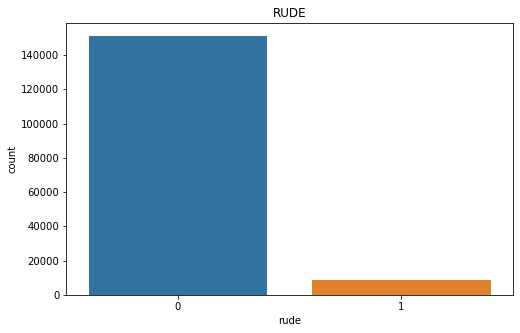

0    94.705178
1     5.294822
Name: rude, dtype: float64


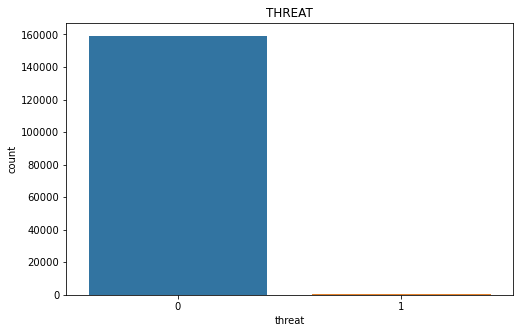

0    99.700447
1     0.299553
Name: threat, dtype: float64


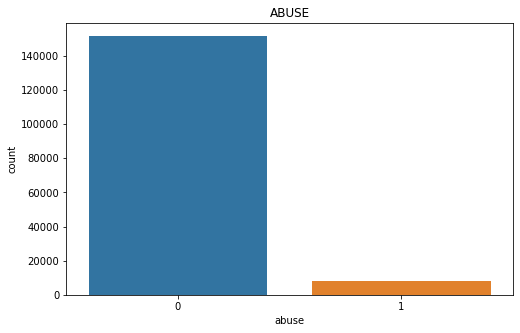

0    95.063639
1     4.936361
Name: abuse, dtype: float64


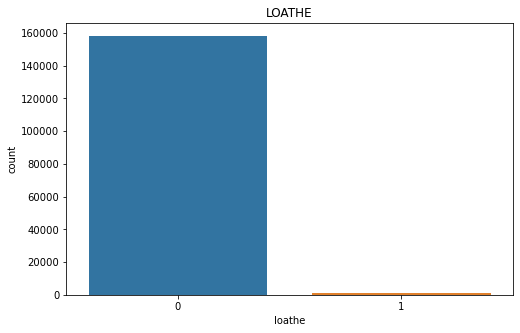

0    99.119514
1     0.880486
Name: loathe, dtype: float64


In [162]:
for x in columns:
    plt.figure(figsize=(8,5))
    sns.countplot(df1[x])
    plt.title(str.upper(x))
    plt.show()
    
    print(df1[x].value_counts(normalize=True)*100)

Checking string length for each type of statement

In [87]:
columns=['malignant','highly_malignant','rude','threat','abuse','loathe']

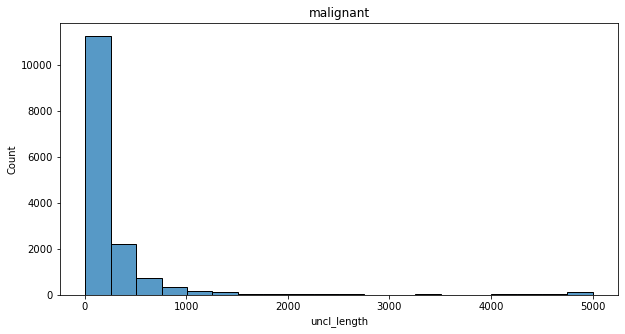

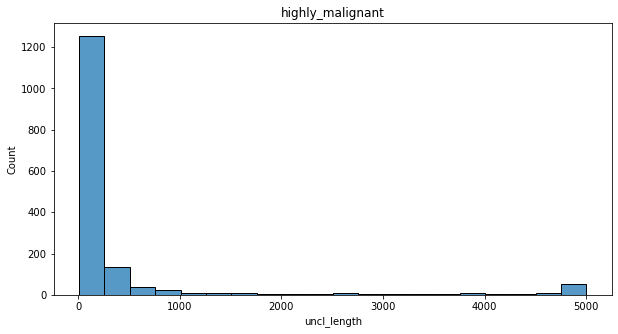

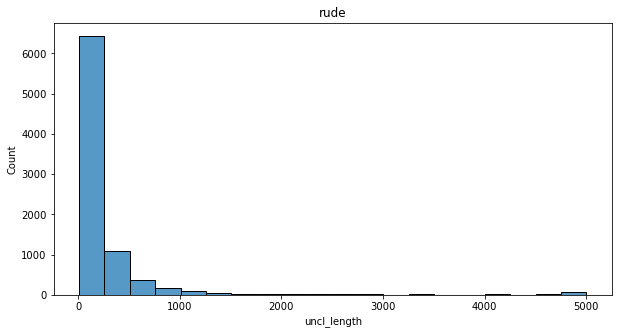

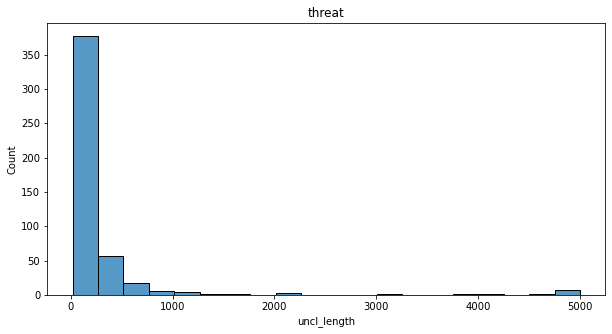

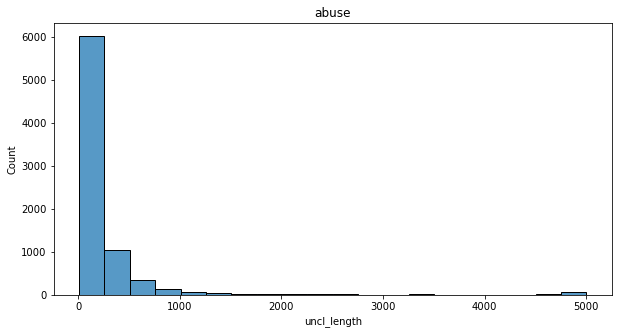

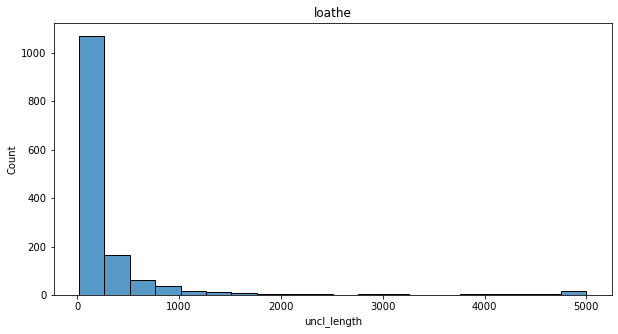

In [285]:
for column in columns:
    plt.figure(figsize=(10,5))
    sns.histplot(df1[df1[column]==1]['uncl_length'],bins=20)
    plt.title(column)
    plt.show()

In [96]:
# Creating a new column Bad which will mark toxic statement as 1 and positive statement as 0
df1['bad']=df1.iloc[:,2:8].sum(axis=1)

for i in range(len(df1.bad)):
    if df1['bad'][i]>0:
        df1['bad'][i]=1
    else:
        pass

In [98]:
df1.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,uncl_length,cleaned_length,bad
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,170,0
1,000103f0d9cfb60f,aww match background colour I seemingly stuck ...,0,0,0,0,0,0,112,93,0
2,000113f07ec002fd,hey man I really trying edit war guy constantl...,0,0,0,0,0,0,233,143,0
3,0001b41b1c6bb37e,cannot make real suggestion improvement wonder...,0,0,0,0,0,0,622,372,0
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,67,29,0


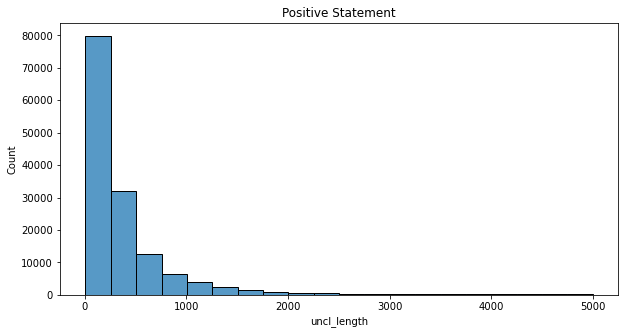

In [99]:
plt.figure(figsize=(10,5))
sns.histplot(df1[df1['bad']==0]['uncl_length'],bins=20)
plt.title('Positive Statement')
plt.show()

# Correlation Matrix

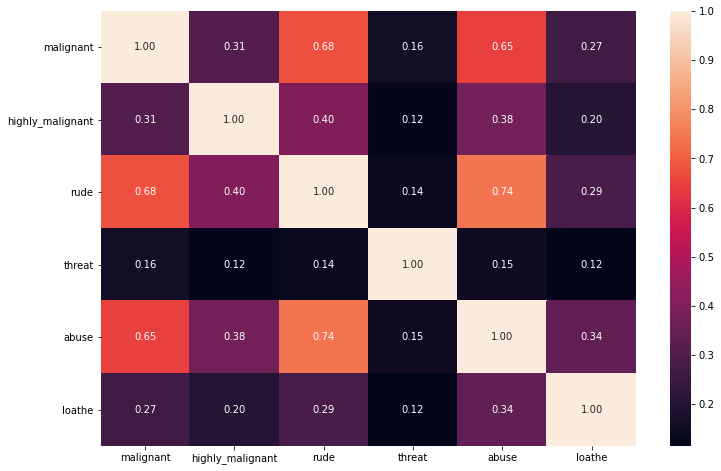

In [167]:
df1_corr=df_train.corr()

# Plotting a heatmap of Correlation to visualize

plt.figure(figsize=(12,8))
sns.heatmap(df1_corr,annot=True,fmt='.2f')
plt.show()

Checking top words

In [142]:
from collections import  Counter

def top_words(text):
    stop=set(stopwords.words('english'))
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    
    plt.figure(figsize=(15,12))        
    sns.barplot(x=y,y=x)
    plt.title('Top Words')
    plt.show()

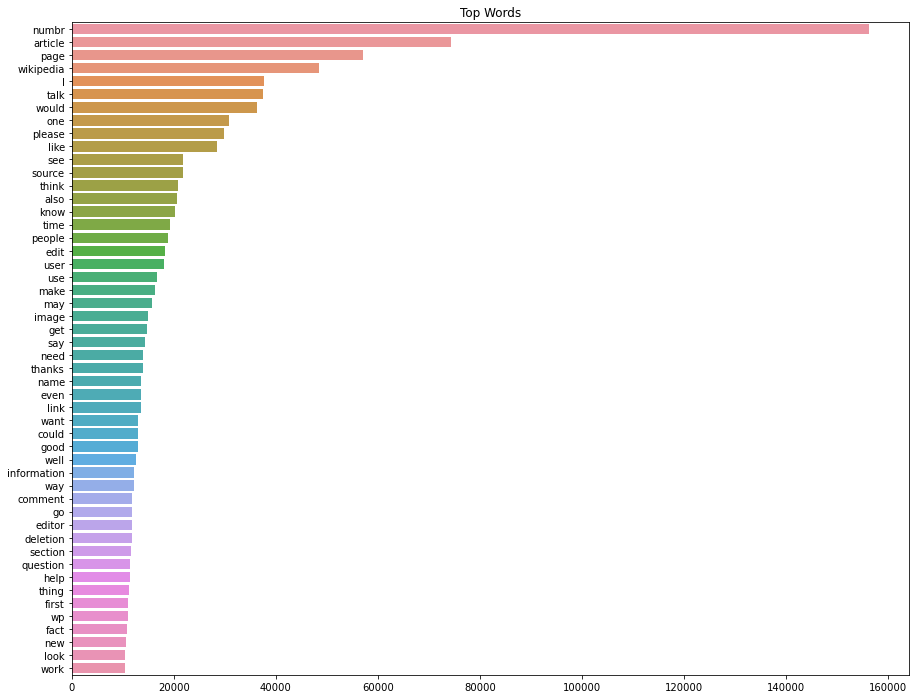

In [143]:
top_words(df1['comment_text'])

# Word Cloud

In [106]:
from wordcloud import WordCloud, STOPWORDS

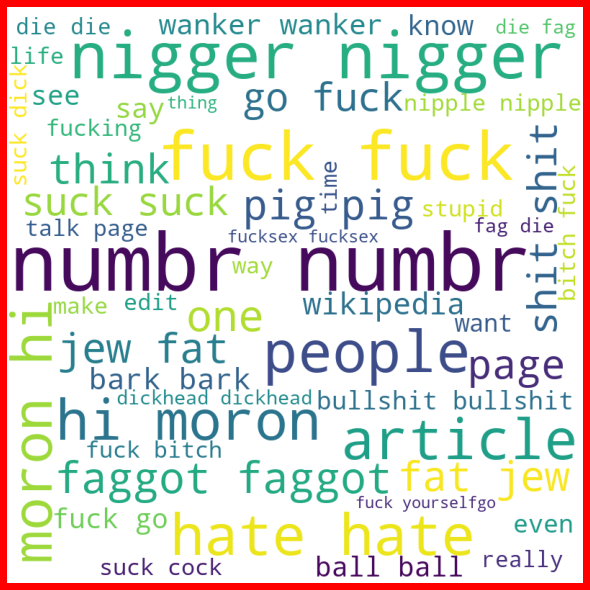

In [109]:
com_malig=df1['comment_text'][df1['malignant']==1]

wc_1= WordCloud(width = 800, height = 800,
                background_color ='white',
               max_words=50,
                min_font_size = 10).generate(' '.join(com_malig))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(wc_1)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

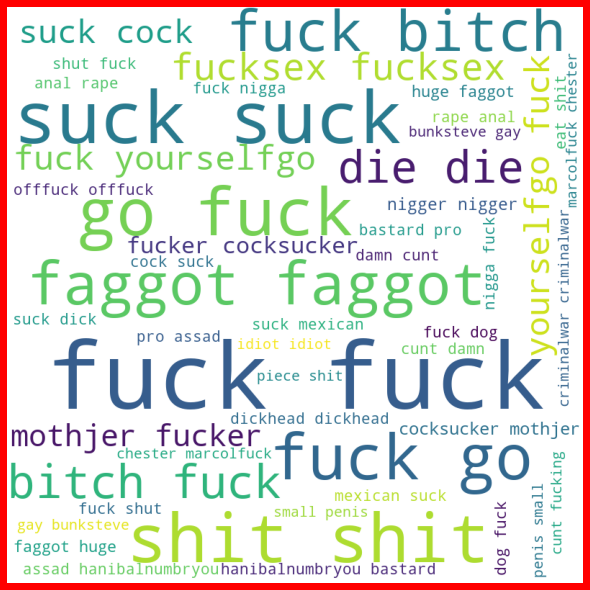

In [110]:
com_hmalig=df1['comment_text'][df1['highly_malignant']==1]

wc_2= WordCloud(width = 800, height = 800,
                background_color ='white',
               max_words=50,
                min_font_size = 10).generate(' '.join(com_hmalig))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(wc_2)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

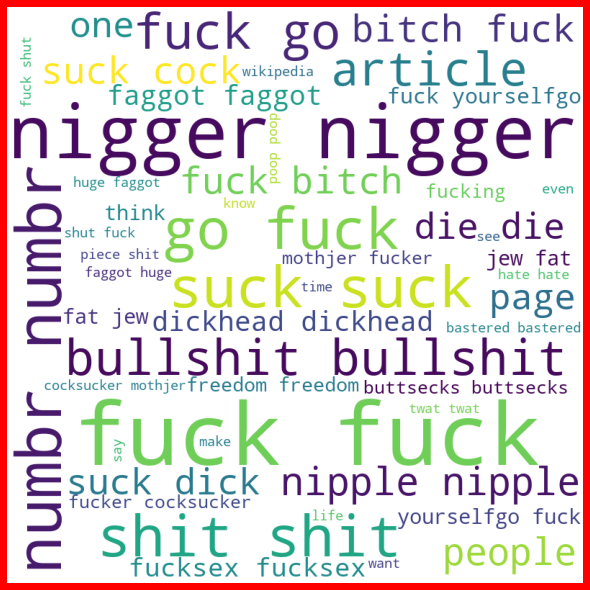

In [111]:
com_rude=df1['comment_text'][df1['rude']==1]

wc_3= WordCloud(width = 800, height = 800,
                background_color ='white',
               max_words=50,
                min_font_size = 10).generate(' '.join(com_rude))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(wc_3)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

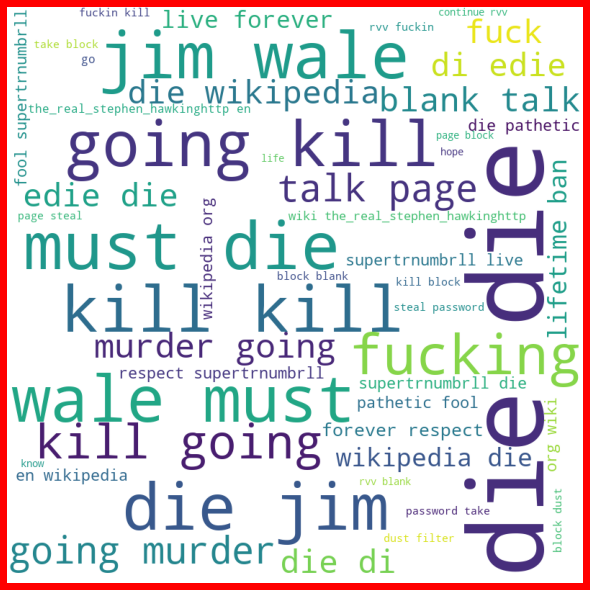

In [112]:
com_threat=df1['comment_text'][df1['threat']==1]

wc_4= WordCloud(width = 800, height = 800,
                background_color ='white',
               max_words=50,
                min_font_size = 10).generate(' '.join(com_threat))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(wc_4)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

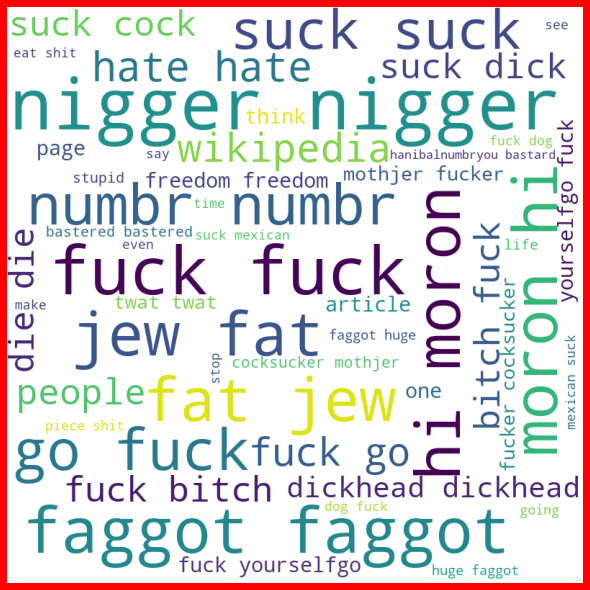

In [113]:
com_abuse=df1['comment_text'][df1['abuse']==1]

wc_5= WordCloud(width = 800, height = 800,
                background_color ='white',
               max_words=50,
                min_font_size = 10).generate(' '.join(com_abuse))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(wc_5)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

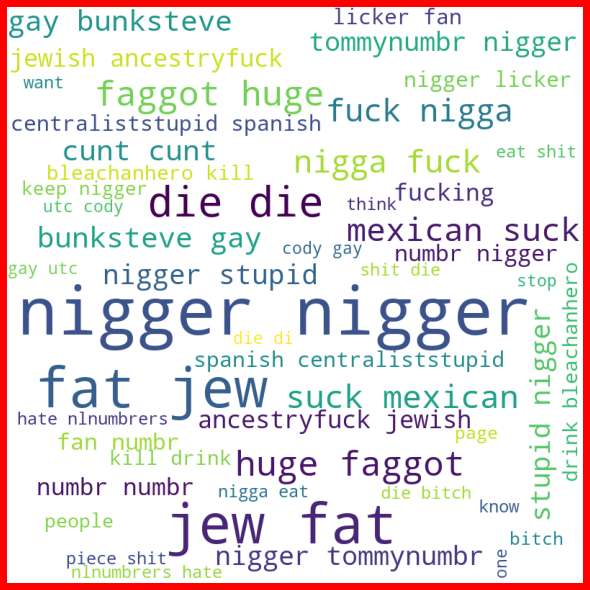

In [114]:
com_loathe=df1['comment_text'][df1['loathe']==1]

wc_6= WordCloud(width = 800, height = 800,
                background_color ='white',
               max_words=50,
                min_font_size = 10).generate(' '.join(com_loathe))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(wc_6)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [169]:
import eli5

In [178]:
algos=[rfc_malig,rfc_hmalig]

In [183]:
eli5.show_weights(rfc_malig,vec = vectorizer, top = 20)

Weight,Feature
0.0245 ± 0.0352,fuck
0.0148 ± 0.0240,fucking
0.0130 ± 0.0285,article
0.0117 ± 0.0186,talk
0.0108 ± 0.0137,numbr
0.0093 ± 0.0171,shit
0.0079 ± 0.0141,as
0.0079 ± 0.0115,stupid
0.0078 ± 0.0109,suck
0.0075 ± 0.0107,thanks


# Vectorizing

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer   # for vectorizing text

In [16]:
vectorizer=TfidfVectorizer()

features=vectorizer.fit_transform(df1['comment_text'])
X=features



# For Malignant Comments

In [17]:
Y_malig=df1['malignant']

# Balancing Dataset

In [18]:
# Using SMOTE to oversample minorities and balance our dataset

from imblearn.over_sampling import SMOTE

In [19]:
smote=SMOTE(sampling_strategy='minority')

In [20]:
x_malig_bal,y_malig_bal=smote.fit_resample(X,Y_malig)

In [21]:
y_malig_bal.value_counts()

0    144277
1    144277
Name: malignant, dtype: int64

In [21]:
x_malig=x_malig_bal
y_malig=y_malig_bal

In [22]:
# Importing Classification Algorithms
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Finding Best Random State

In [25]:
maxAccu=0
maxRs=0
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x_malig,y_malig,test_size=.33,random_state=i)
    mnb=MultinomialNB()
    mnb.fit(x_train,y_train)
    mnb_pred=mnb.predict(x_test)
    acc=accuracy_score(y_test,mnb_pred)*100
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best Accuracy Score is : ', maxAccu, ' when Random state is : ',maxRs)

Best Accuracy Score is :  90.72703023429214  when Random state is :  122


# Train Test Split

In [23]:
x_train_malig,x_test_malig,y_train_malig,y_test_malig=train_test_split(x_malig,y_malig,test_size=.33,random_state=122)

In [25]:
# Defining Model List
model_list=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),MultinomialNB(),XGBClassifier(verbosity=0)]

In [28]:
# Creating For loop to print Training and Test accuracy score
for m in model_list:
    model=m
    model.fit(x_train_malig,y_train_malig)
    model_pred_train=model.predict(x_train_malig)
    model_pred=model.predict(x_test_malig)
    print('Training Accuracy for the model ',m,' is: ',accuracy_score(y_train_malig,model_pred_train))
    print('Testing Accuracy for the model ',m,' is: ',accuracy_score(y_test_malig,model_pred))
    print('\n')

Training Accuracy for the model  LogisticRegression()  is:  0.9473752269423942
Testing Accuracy for the model  LogisticRegression()  is:  0.9345326234208122


Training Accuracy for the model  DecisionTreeClassifier()  is:  0.9997258587603643
Testing Accuracy for the model  DecisionTreeClassifier()  is:  0.94344853659305


Training Accuracy for the model  KNeighborsClassifier()  is:  0.5657706213695682
Testing Accuracy for the model  KNeighborsClassifier()  is:  0.5465276246285036


Training Accuracy for the model  RandomForestClassifier()  is:  0.9997258587603643
Testing Accuracy for the model  RandomForestClassifier()  is:  0.9842159982357204


Training Accuracy for the model  GradientBoostingClassifier()  is:  0.8395394427174121
Testing Accuracy for the model  GradientBoostingClassifier()  is:  0.8395660712222888


Training Accuracy for the model  AdaBoostClassifier()  is:  0.8209081833746269
Testing Accuracy for the model  AdaBoostClassifier()  is:  0.8208731083876795


Training Acc

# Cross Validation

In [26]:
from sklearn.model_selection import cross_val_score

In [30]:
# Logistic Regression
lr_malig=LogisticRegression()
lr_malig.fit(x_train_malig,y_train_malig)
lr_malig_pred=lr_malig.predict(x_test_malig)
testing_accu=accuracy_score(y_test_malig,lr_malig_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(lr_malig,x_malig,y_malig,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score is 92.93407819680198 and the accuracy for testing is 93.58138264914989 


At crossfold 3 the CV score is 93.34474857903948 and the accuracy for testing is 93.58138264914989 


At crossfold 4 the CV score is 93.54055372331034 and the accuracy for testing is 93.58138264914989 


At crossfold 5 the CV score is 93.64729126509617 and the accuracy for testing is 93.58138264914989 


At crossfold 6 the CV score is 93.69789193739835 and the accuracy for testing is 93.58138264914989 


At crossfold 7 the CV score is 93.72769048427678 and the accuracy for testing is 93.58138264914989 


At crossfold 8 the CV score is 93.76512602147365 and the accuracy for testing is 93.58138264914989 


At crossfold 9 the CV score is 93.7800254874809 and the accuracy for testing is 93.58138264914989 




In [31]:
# DecisionTreeClassifier
dtc_malig=DecisionTreeClassifier()
dtc_malig.fit(x_train_malig,y_train_malig)
dtc_malig_pred=dtc_malig.predict(x_test_malig)
testing_accu=accuracy_score(y_test_malig,dtc_malig_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(dtc_malig,x_malig,y_malig,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score is 93.39707645709295 and the accuracy for testing is 94.36165632252712 


At crossfold 3 the CV score is 94.31649009925502 and the accuracy for testing is 94.36165632252712 


At crossfold 4 the CV score is 94.64398656366204 and the accuracy for testing is 94.36165632252712 


At crossfold 5 the CV score is 94.93439814704679 and the accuracy for testing is 94.36165632252712 


At crossfold 6 the CV score is 95.01029793672427 and the accuracy for testing is 94.36165632252712 


At crossfold 7 the CV score is 95.08064348440844 and the accuracy for testing is 94.36165632252712 


At crossfold 8 the CV score is 95.14303055306705 and the accuracy for testing is 94.36165632252712 


At crossfold 9 the CV score is 95.12362080499123 and the accuracy for testing is 94.36165632252712 




# Ensemble Methods

In [ ]:
# RandomForestClassifier
rfc_malig=RandomForestClassifier()
rfc_malig.fit(x_train_malig,y_train_malig)
rfc_malig_pred=rfc_malig.predict(x_test_malig)
testing_accu=accuracy_score(y_test_malig,rfc_malig_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(rfc_malig,x_malig,y_malig,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score is 97.78620292908779 and the accuracy for testing is 98.34703800552388 


At crossfold 3 the CV score is 98.33306834086879 and the accuracy for testing is 98.34703800552388 


At crossfold 4 the CV score is 98.55243847111446 and the accuracy for testing is 98.34703800552388 


At crossfold 5 the CV score is 98.60650053812762 and the accuracy for testing is 98.34703800552388 


At crossfold 6 the CV score is 98.64635551712534 and the accuracy for testing is 98.34703800552388 




# Naive Bayes

In [29]:
# MultinomialNB

mnb_malig=MultinomialNB()
mnb_malig.fit(x_train_malig,y_train_malig)
mnb_malig_pred=mnb_malig.predict(x_test_malig)
testing_accu=accuracy_score(y_test_malig,mnb_malig_pred)*100
for k in range(3,7):
    cv_score=cross_val_score(mnb_malig,x_malig,y_malig,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 3 the CV score is 90.32867416359522 and the accuracy for testing is 90.63986641882738 


At crossfold 4 the CV score is 90.5993343795721 and the accuracy for testing is 90.63986641882738 


At crossfold 5 the CV score is 90.71438977539543 and the accuracy for testing is 90.63986641882738 


At crossfold 6 the CV score is 90.80414857077388 and the accuracy for testing is 90.63986641882738 




# Extreme Gradient Boosting

In [30]:
# XGBClassifier

xgb_malig=XGBClassifier(verbosity=0)
xgb_malig.fit(x_train_malig,y_train_malig)
xgb_malig_pred=xgb_malig.predict(x_test_malig)
testing_accu=accuracy_score(y_test_malig,xgb_malig_pred)*100
for k in range(3,7):
    cv_score=cross_val_score(xgb_malig,x_malig,y_malig,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 3 the CV score is 91.28551630981617 and the accuracy for testing is 91.55141089862742 


At crossfold 4 the CV score is 91.36591943897423 and the accuracy for testing is 91.55141089862742 


At crossfold 5 the CV score is 91.38601723804497 and the accuracy for testing is 91.55141089862742 


At crossfold 6 the CV score is 91.38463767238541 and the accuracy for testing is 91.55141089862742 




Checking Classification Reports of Top 5 models

In [34]:
print('Classification Report for LR is : \n',classification_report(y_test_malig,lr_malig_pred),'\n')
print('---------------------------')
print('Classification Report for DTC is : \n',classification_report(y_test_malig,dtc_malig_pred),'\n')
print('---------------------------')
print('Classification Report for RFC is : \n',classification_report(y_test_malig,rfc_malig_pred),'\n')
print('---------------------------')
print('Classification Report for MNB is : \n',classification_report(y_test_malig,mnb_malig_pred),'\n')
print('---------------------------')
print('Classification Report for XGB is : \n',classification_report(y_test_malig,xgb_malig_pred),'\n')
print('---------------------------')

Classification Report for LR is : 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93     47987
           1       0.92      0.95      0.94     47236

    accuracy                           0.93     95223
   macro avg       0.93      0.93      0.93     95223
weighted avg       0.94      0.93      0.93     95223
 

---------------------------
Classification Report for DTC is : 
               precision    recall  f1-score   support

           0       0.97      0.92      0.95     47987
           1       0.92      0.97      0.95     47236

    accuracy                           0.95     95223
   macro avg       0.95      0.95      0.95     95223
weighted avg       0.95      0.95      0.95     95223
 

---------------------------
Classification Report for RFC is : 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98     47987
           1       0.98      0.99      0.98     47236

    accuracy

Checking Confusion Matrix of Top 5 models

In [35]:
print('Confusion Matrix for LR is : \n',confusion_matrix(y_test_malig,lr_malig_pred),'\n')
print('---------------------------')
print('Confusion Matrix for DTC is : \n',confusion_matrix(y_test_malig,dtc_malig_pred),'\n')
print('---------------------------')
print('Confusion Matrix for RFC is : \n',confusion_matrix(y_test_malig,rfc_malig_pred),'\n')
print('---------------------------')
print('Confusion Matrix for MNB is : \n',confusion_matrix(y_test_malig,mnb_malig_pred),'\n')
print('---------------------------')
print('Confusion Matrix for XGB is : \n',confusion_matrix(y_test_malig,xgb_malig_pred),'\n')
print('---------------------------')

Confusion Matrix for LR is : 
 [[43868  4119]
 [ 2137 45099]] 

---------------------------
Confusion Matrix for DTC is : 
 [[44171  3816]
 [ 1310 45926]] 

---------------------------
Confusion Matrix for RFC is : 
 [[46873  1114]
 [  350 46886]] 

---------------------------
Confusion Matrix for MNB is : 
 [[45024  2963]
 [ 5950 41286]] 

---------------------------
Confusion Matrix for XGB is : 
 [[46369  1618]
 [ 6427 40809]] 

---------------------------


# Plotting Auc Roc Curve

In [36]:
# Importing Auc Roc
from sklearn.metrics import roc_curve,roc_auc_score

In [41]:
algo_name=['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Multinomial NB','XGB Classifier']
model_name_malig=[lr_malig,dtc_malig,rfc_malig,mnb_malig,xgb_malig]

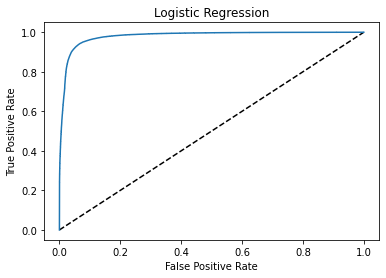


--------------------

Auc Score of Logistic Regression:

98.00020766361091

-------------------


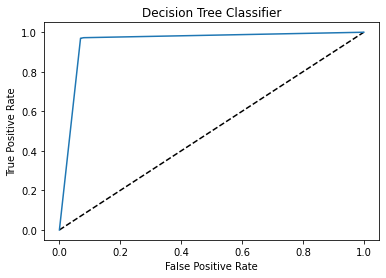


--------------------

Auc Score of Decision Tree Classifier:

95.12706116371106

-------------------


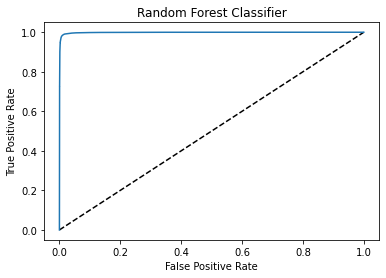


--------------------

Auc Score of Random Forest Classifier:

99.87378038932881

-------------------


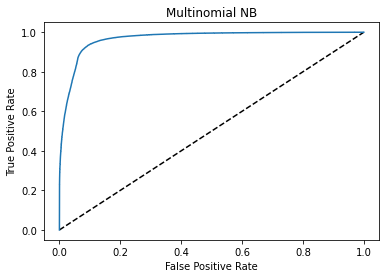


--------------------

Auc Score of Multinomial NB:

96.77685077642165

-------------------


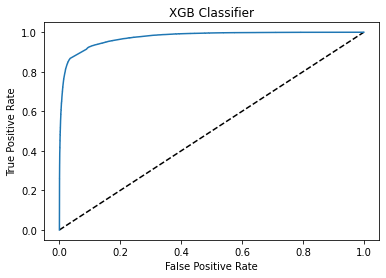


--------------------

Auc Score of XGB Classifier:

97.42290204002681

-------------------


In [42]:
for j, k in zip(model_name_malig,algo_name):
    
    y_pred_prob=j.predict_proba(x_test_malig)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test_malig,y_pred_prob)
    
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=k)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(k)
    plt.show()
    
    # Auc Score
    print('\n--------------------\n')
    print(f'Auc Score of {k}:\n')
    auc_score=roc_auc_score(y_test_malig,y_pred_prob)*100
    print(auc_score)
    print('\n-------------------')

We get the best performance from Random Forest Classifier. We will try to further hypertune to check for improvement

# Hypertuning

In [44]:
# Importing Random Search CV

from sklearn.model_selection import RandomizedSearchCV

In [45]:
# defining parameters for Random Forest


rfc_param={'n_estimators':list(range(50,400,50)),'max_depth' : np.arange(2,15),'criterion':['gini','entropy'],'max_features':['auto', 'sqrt', 'log2']}
rcv_rfc= RandomizedSearchCV(estimator=rfc_malig,param_distributions=rfc_param,scoring='accuracy',cv=5)

In [47]:
# Getting Best Parameters

rcv_rfc.fit(x_train_malig,y_train_malig)
rcv_rfc.best_params_

{'n_estimators': 100,
 'max_features': 'sqrt',
 'max_depth': 14,
 'criterion': 'entropy'}

In [48]:
rfc1_malig=RandomForestClassifier(criterion='entropy',max_depth=14,max_features='sqrt',n_estimators=100)
rfc1_malig.fit(x_train_malig,y_train_malig)
rfc1_malig_pred=rfc1_malig.predict(x_test_malig)

print('Accuracy Score of the model is : \n',accuracy_score(y_test_malig,rfc1_malig_pred)*100,'\n')
print('Confusion Matrix is : \n',confusion_matrix(y_test_malig,rfc1_malig_pred),'\n')
print('Classification Report is : \n',classification_report(y_test_malig,rfc1_malig_pred),'\n')

Accuracy Score of the model is : 
 81.1694653602596 

Confusion Matrix is : 
 [[33664 14323]
 [ 3608 43628]] 

Classification Report is : 
               precision    recall  f1-score   support

           0       0.90      0.70      0.79     47987
           1       0.75      0.92      0.83     47236

    accuracy                           0.81     95223
   macro avg       0.83      0.81      0.81     95223
weighted avg       0.83      0.81      0.81     95223
 



Hypertuning didn't help much with the performance. Thus, We move ahead with the Random Forest With Default Parameters

# Saving the model

In [54]:
import pickle

In [55]:
filename='comment_malignant.pkl'
pickle.dump(rfc_malig,open(filename,'wb'))

# For Highly Malignant Comments 

In [49]:
Y_hmalig=df1['highly_malignant']

# Balancing Dataset

In [50]:
x_hmalig_bal,y_hmalig_bal=smote.fit_resample(X,Y_hmalig)

In [51]:
y_hmalig_bal.value_counts()

0    157976
1    157976
Name: highly_malignant, dtype: int64

In [52]:
x_hmalig = x_hmalig_bal
y_hmalig = y_hmalig_bal

# Finding Best Random State

In [33]:
maxAccu=0
maxRs=0
for i in range(1,500):
    x_train_hmalig,x_test_hmalig,y_train_hmalig,y_test_hmalig=train_test_split(x_hmalig,y_hmalig,test_size=.33,random_state=i)
    mnb=MultinomialNB()
    mnb.fit(x_train_hmalig,y_train_hmalig)
    mnb_pred=mnb.predict(x_test_hmalig)
    acc=accuracy_score(y_test_hmalig,mnb_pred)*100
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best Accuracy Score is : ', maxAccu, ' when Random state is : ',maxRs)

Best Accuracy Score is :  97.48813120414329  when Random state is :  42


# Train Test Split

In [58]:
x_train_hmalig,x_test_hmalig,y_train_hmalig,y_test_hmalig=train_test_split(x_hmalig,y_hmalig,test_size=.33,random_state=42)

In [ ]:
# Defining Model List
model_list=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),MultinomialNB(),XGBClassifier(verbosity=0)]

In [35]:
# Creating For loop to print Training and Test accuracy score
for m in model_list:
    model=m
    model.fit(x_train_hmalig,y_train_hmalig)
    model_pred_train=model.predict(x_train_hmalig)
    model_pred=model.predict(x_test_hmalig)
    print('Training Accuracy for the model ',m,' is: ',accuracy_score(y_train_hmalig,model_pred_train))
    print('Testing Accuracy for the model ',m,' is: ',accuracy_score(y_test_hmalig,model_pred))
    print('\n')

Training Accuracy for the model  LogisticRegression()  is:  0.9769470964206588
Testing Accuracy for the model  LogisticRegression()  is:  0.9765405457248357


Training Accuracy for the model  DecisionTreeClassifier()  is:  0.9996457033261372
Testing Accuracy for the model  DecisionTreeClassifier()  is:  0.9889991847695775


Training Accuracy for the model  KNeighborsClassifier()  is:  0.5786940152205851
Testing Accuracy for the model  KNeighborsClassifier()  is:  0.5622404450199012


Training Accuracy for the model  RandomForestClassifier()  is:  0.9996457033261372
Testing Accuracy for the model  RandomForestClassifier()  is:  0.9959622116721815


Training Accuracy for the model  GradientBoostingClassifier()  is:  0.9512440537208237
Testing Accuracy for the model  GradientBoostingClassifier()  is:  0.9508368100513116


Training Accuracy for the model  AdaBoostClassifier()  is:  0.940204169363258
Testing Accuracy for the model  AdaBoostClassifier()  is:  0.9395770392749244


Training Ac

# Cross Validation

In [59]:
# Logistic Regression

lr_hmalig=LogisticRegression()
lr_hmalig.fit(x_train_hmalig,y_train_hmalig)
lr_hmalig_pred=lr_hmalig.predict(x_test_hmalig)
testing_accu=accuracy_score(y_test_hmalig,lr_hmalig_pred)*100
for k in range(3,7):
    cv_score=cross_val_score(lr_hmalig,x_hmalig,y_hmalig,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 3 the CV score is 97.56355417088565 and the accuracy for testing is 97.65021819402484 


At crossfold 4 the CV score is 97.66451866106244 and the accuracy for testing is 97.65021819402484 


At crossfold 5 the CV score is 97.71610904935525 and the accuracy for testing is 97.65021819402484 


At crossfold 6 the CV score is 97.74965836808165 and the accuracy for testing is 97.65021819402484 




In [60]:
# DecisionTreeClassifier

dtc_hmalig=DecisionTreeClassifier()
dtc_hmalig.fit(x_train_hmalig,y_train_hmalig)
dtc_hmalig_pred=dtc_hmalig.predict(x_test_hmalig)
testing_accu=accuracy_score(y_test_hmalig,dtc_hmalig_pred)*100
for k in range(3,7):
    cv_score=cross_val_score(dtc_hmalig,x_hmalig,y_hmalig,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 3 the CV score is 98.84286223794837 and the accuracy for testing is 98.89128662542561 


At crossfold 4 the CV score is 98.89160378791715 and the accuracy for testing is 98.89128662542561 


At crossfold 5 the CV score is 98.94034540291238 and the accuracy for testing is 98.89128662542561 


At crossfold 6 the CV score is 98.9473086061023 and the accuracy for testing is 98.89128662542561 




# Ensemble Method

In [61]:
# RandomForestClassifier

rfc_hmalig=RandomForestClassifier()
rfc_hmalig.fit(x_train_hmalig,y_train_hmalig)
rfc_hmalig_pred=rfc_hmalig.predict(x_test_hmalig)
testing_accu=accuracy_score(y_test_hmalig,rfc_hmalig_pred)*100
for k in range(3,7):
    cv_score=cross_val_score(rfc_hmalig,x_hmalig,y_hmalig,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 3 the CV score is 99.57746755656581 and the accuracy for testing is 99.59909845106219 


At crossfold 4 the CV score is 99.61038385577557 and the accuracy for testing is 99.59909845106219 


At crossfold 5 the CV score is 99.61766359679369 and the accuracy for testing is 99.59909845106219 


At crossfold 6 the CV score is 99.6325392400472 and the accuracy for testing is 99.59909845106219 




# Naive Bayes

In [62]:
# MultinomialNB

mnb_hmalig=MultinomialNB()
mnb_hmalig.fit(x_train_hmalig,y_train_hmalig)
mnb_hmalig_pred=mnb_hmalig.predict(x_test_hmalig)
testing_accu=accuracy_score(y_test_hmalig,mnb_hmalig_pred)*100
for k in range(3,7):
    cv_score=cross_val_score(mnb_hmalig,x_hmalig,y_hmalig,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 3 the CV score is 97.37175271030716 and the accuracy for testing is 97.48621301491393 


At crossfold 4 the CV score is 97.38472932597357 and the accuracy for testing is 97.48621301491393 


At crossfold 5 the CV score is 97.39137596615033 and the accuracy for testing is 97.48621301491393 


At crossfold 6 the CV score is 97.39295869232522 and the accuracy for testing is 97.48621301491393 




# Extreme Gradient Boosting

In [63]:
# XGBClassifier

xgb_hmalig=XGBClassifier(verbosity=0)
xgb_hmalig.fit(x_train_hmalig,y_train_hmalig)
xgb_hmalig_pred=xgb_hmalig.predict(x_test_hmalig)
testing_accu=accuracy_score(y_test_hmalig,xgb_hmalig_pred)*100
for k in range(3,7):
    cv_score=cross_val_score(xgb_hmalig,x_hmalig,y_hmalig,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 3 the CV score is 98.41684838624599 and the accuracy for testing is 98.46832590035007 


At crossfold 4 the CV score is 98.4345723401023 and the accuracy for testing is 98.46832590035007 


At crossfold 5 the CV score is 98.45704457368362 and the accuracy for testing is 98.46832590035007 


At crossfold 6 the CV score is 98.46907151166234 and the accuracy for testing is 98.46832590035007 




Checking Classification Reports of Top 5 models

In [64]:
print('Classification Report for LR is : \n',classification_report(y_test_hmalig,lr_hmalig_pred),'\n')
print('---------------------------')
print('Classification Report for DTC is : \n',classification_report(y_test_hmalig,dtc_hmalig_pred),'\n')
print('---------------------------')
print('Classification Report for RFC is : \n',classification_report(y_test_hmalig,rfc_hmalig_pred),'\n')
print('---------------------------')
print('Classification Report for MNB is : \n',classification_report(y_test_hmalig,mnb_hmalig_pred),'\n')
print('---------------------------')
print('Classification Report for XGB is : \n',classification_report(y_test_hmalig,xgb_hmalig_pred),'\n')
print('---------------------------')

Classification Report for LR is : 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98     52187
           1       0.97      0.98      0.98     52078

    accuracy                           0.98    104265
   macro avg       0.98      0.98      0.98    104265
weighted avg       0.98      0.98      0.98    104265
 

---------------------------
Classification Report for DTC is : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     52187
           1       0.98      1.00      0.99     52078

    accuracy                           0.99    104265
   macro avg       0.99      0.99      0.99    104265
weighted avg       0.99      0.99      0.99    104265
 

---------------------------
Classification Report for RFC is : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     52187
           1       0.99      1.00      1.00     52078

    accuracy

Checking confusion matrix of Top 5 models

In [79]:
print('Confusion Matrix for LR is : \n',confusion_matrix(y_test_hmalig,lr_hmalig_pred),'\n')
print('---------------------------')
print('Confusion Matrix for DTC is : \n',confusion_matrix(y_test_hmalig,dtc_hmalig_pred),'\n')
print('---------------------------')
print('Confusion Matrix for RFC is : \n',confusion_matrix(y_test_hmalig,rfc_hmalig_pred),'\n')
print('---------------------------')
print('Confusion Matrix for MNB is : \n',confusion_matrix(y_test_hmalig,mnb_hmalig_pred),'\n')
print('---------------------------')
print('Confusion Matrix for XGB is : \n',confusion_matrix(y_test_hmalig,xgb_hmalig_pred),'\n')
print('---------------------------')

Confusion Matrix for LR is : 
 [[50848  1339]
 [ 1111 50967]] 

---------------------------
Confusion Matrix for DTC is : 
 [[51172  1015]
 [  141 51937]] 

---------------------------
Confusion Matrix for RFC is : 
 [[51822   365]
 [   53 52025]] 

---------------------------
Confusion Matrix for MNB is : 
 [[49809  2378]
 [  243 51835]] 

---------------------------
Confusion Matrix for XGB is : 
 [[51138  1049]
 [  548 51530]] 

---------------------------


# Plotting Auc Roc Curve

In [66]:
algo_name=['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Multinomial NB','XGB Classifier']
model_name_hmalig=[lr_hmalig,dtc_hmalig,rfc_hmalig,mnb_hmalig,xgb_hmalig]

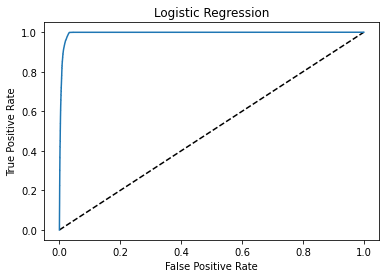


--------------------

Auc Score of Logistic Regression:

99.4946720745289

-------------------


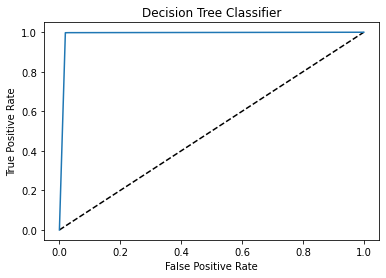


--------------------

Auc Score of Decision Tree Classifier:

98.91613710794256

-------------------


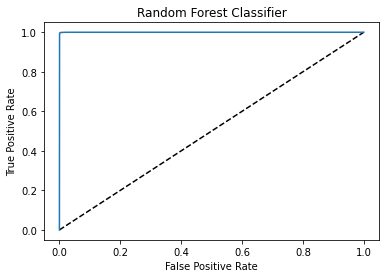


--------------------

Auc Score of Random Forest Classifier:

99.9907977040911

-------------------


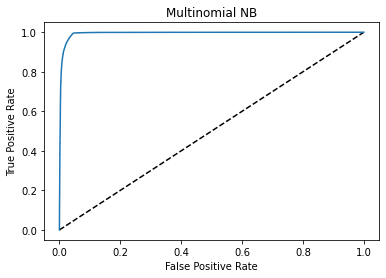


--------------------

Auc Score of Multinomial NB:

99.45136085424522

-------------------


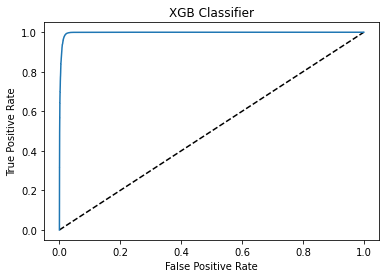


--------------------

Auc Score of XGB Classifier:

99.7388100801817

-------------------


In [67]:
for j, k in zip(model_name_hmalig,algo_name):
    
    y_pred_prob=j.predict_proba(x_test_hmalig)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test_hmalig,y_pred_prob)
    
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=k)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(k)
    plt.show()
    
    # Auc Score
    print('\n--------------------\n')
    print(f'Auc Score of {k}:\n')
    auc_score=roc_auc_score(y_test_hmalig,y_pred_prob)*100
    print(auc_score)
    print('\n-------------------')

On the basis of Validation, Recall, Precision, F1 score and Auc grapg and score we see best performance with Random Forest Classifier.Thus, we try to hypertune it to see any improvement. 

# Hypertuning

In [69]:
# defining parameters for Random Forest


rfc_param={'n_estimators':list(range(50,400,50)),'max_depth' : np.arange(2,15),'criterion':['gini','entropy'],'max_features':['auto', 'sqrt', 'log2']}
rcv_rfc= RandomizedSearchCV(estimator=rfc_hmalig,param_distributions=rfc_param,scoring='accuracy',cv=5)

In [70]:
# Getting Best Parameters

rcv_rfc.fit(x_train_hmalig,y_train_hmalig)
rcv_rfc.best_params_

{'n_estimators': 200,
 'max_features': 'sqrt',
 'max_depth': 5,
 'criterion': 'entropy'}

In [71]:
rfc1_hmalig=RandomForestClassifier(criterion='entropy',max_depth=5,max_features='sqrt',n_estimators=200)
rfc1_hmalig.fit(x_train_hmalig,y_train_hmalig)
rfc1_hmalig_pred=rfc1_hmalig.predict(x_test_hmalig)

print('Accuracy Score of the model is : \n',accuracy_score(y_test_hmalig,rfc1_hmalig_pred)*100,'\n')
print('Confusion Matrix is : \n',confusion_matrix(y_test_hmalig,rfc1_hmalig_pred),'\n')
print('Classification Report is : \n',classification_report(y_test_hmalig,rfc1_hmalig_pred),'\n')

Accuracy Score of the model is : 
 86.48731597372081 

Confusion Matrix is : 
 [[39410 12777]
 [ 1312 50766]] 

Classification Report is : 
               precision    recall  f1-score   support

           0       0.97      0.76      0.85     52187
           1       0.80      0.97      0.88     52078

    accuracy                           0.86    104265
   macro avg       0.88      0.86      0.86    104265
weighted avg       0.88      0.86      0.86    104265
 



Hypertuning didn't help much with the performance. Thus, We move ahead with the Random Forest With Default Parameters

# Saving the Model

In [72]:
filename='comment_higlymalignant.pkl'
pickle.dump(rfc_hmalig,open(filename,'wb'))

# For Rude Comments

In [73]:
Y_rude=df1['rude']

# Balancing Dataset

In [74]:
x_rude_bal,y_rude_bal=smote.fit_resample(X,Y_rude)

In [75]:
y_rude_bal.value_counts()

0    151122
1    151122
Name: rude, dtype: int64

In [76]:
x_rude = x_rude_bal
y_rude = y_rude_bal

In [ ]:
Finding Best Random State

In [77]:
maxAccu=0
maxRs=0
for i in range(1,500):
    x_train_rude,x_test_rude,y_train_rude,y_test_rude=train_test_split(x_rude,y_rude,test_size=.33,random_state=i)
    mnb=MultinomialNB()
    mnb.fit(x_train_rude,y_train_rude)
    mnb_pred=mnb.predict(x_test_rude)
    acc=accuracy_score(y_test_rude,mnb_pred)*100
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best Accuracy Score is : ', maxAccu, ' when Random state is : ',maxRs)

Best Accuracy Score is :  93.70970814409321  when Random state is :  59


# Train Test Split

In [81]:
x_train_rude,x_test_rude,y_train_rude,y_test_rude=train_test_split(x_rude,y_rude,test_size=.33,random_state=59)

In [ ]:
# Defining Model List
model_list=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),MultinomialNB(),XGBClassifier(verbosity=0)]

In [82]:
# Creating For loop to print Training and Test accuracy score
for m in model_list:
    model=m
    model.fit(x_train_rude,y_train_rude)
    model_pred_train=model.predict(x_train_rude)
    model_pred=model.predict(x_test_rude)
    print('Training Accuracy for the model ',m,' is: ',accuracy_score(y_train_rude,model_pred_train))
    print('Testing Accuracy for the model ',m,' is: ',accuracy_score(y_test_rude ,model_pred))
    print('\n')

Training Accuracy for the model  LogisticRegression()  is:  0.973891744813657
Testing Accuracy for the model  LogisticRegression()  is:  0.9657312439217574


Training Accuracy for the model  DecisionTreeClassifier()  is:  0.9996839552994277
Testing Accuracy for the model  DecisionTreeClassifier()  is:  0.978363962663298


Training Accuracy for the model  KNeighborsClassifier()  is:  0.5666582717293077
Testing Accuracy for the model  KNeighborsClassifier()  is:  0.5505659658515555


Training Accuracy for the model  RandomForestClassifier()  is:  0.9996839552994277
Testing Accuracy for the model  RandomForestClassifier()  is:  0.991437823964067


Training Accuracy for the model  GradientBoostingClassifier()  is:  0.9115618040226564
Testing Accuracy for the model  GradientBoostingClassifier()  is:  0.9119018257286372


Training Accuracy for the model  AdaBoostClassifier()  is:  0.913161780319304
Testing Accuracy for the model  AdaBoostClassifier()  is:  0.914358187706159


Training Accura

# Cross Validation

In [83]:
# Logistic Regression

lr_rude=LogisticRegression()
lr_rude.fit(x_train_rude,y_train_rude)
lr_rude_pred=lr_rude.predict(x_test_rude)
testing_accu=accuracy_score(y_test_rude,lr_rude_pred)*100
for k in range(3,7):
    cv_score=cross_val_score(lr_rude,x_rude,y_rude,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 3 the CV score is 96.48231230396634 and the accuracy for testing is 96.57512958562677 


At crossfold 4 the CV score is 96.61300141607443 and the accuracy for testing is 96.57512958562677 


At crossfold 5 the CV score is 96.68314377617483 and the accuracy for testing is 96.57512958562677 


At crossfold 6 the CV score is 96.73409563134422 and the accuracy for testing is 96.57512958562677 




In [84]:
# DecisionTreeClassifier

dtc_rude=DecisionTreeClassifier()
dtc_rude.fit(x_train_rude,y_train_rude)
dtc_rude_pred=dtc_rude.predict(x_test_rude)
testing_accu=accuracy_score(y_test_rude,dtc_rude_pred)*100
for k in range(3,7):
    cv_score=cross_val_score(dtc_rude,x_rude,y_rude,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 3 the CV score is 97.91129021585209 and the accuracy for testing is 97.84341444340842 


At crossfold 4 the CV score is 97.99201969269862 and the accuracy for testing is 97.84341444340842 


At crossfold 5 the CV score is 98.03734741489532 and the accuracy for testing is 97.84341444340842 


At crossfold 6 the CV score is 98.09392411429178 and the accuracy for testing is 97.84341444340842 




# Ensemble Method

In [202]:
# RandomForestClassifier

rfc_rude=RandomForestClassifier()
rfc_rude.fit(x_train_rude,y_train_rude)
rfc_rude_pred=rfc_rude.predict(x_test_rude)
testing_accu=accuracy_score(y_test_rude,rfc_rude_pred)*100
for k in range(3,7):
    cv_score=cross_val_score(rfc_rude,x_rude,y_rude,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 3 the CV score is 99.14903190799485 and the accuracy for testing is 99.12373046189632 


At crossfold 4 the CV score is 99.20957901562976 and the accuracy for testing is 99.12373046189632 


At crossfold 5 the CV score is 99.2410107154191 and the accuracy for testing is 99.12373046189632 


At crossfold 6 the CV score is 99.24200314977303 and the accuracy for testing is 99.12373046189632 




# Naive Bayes

In [85]:
# MultinomialNB

mnb_rude=MultinomialNB()
mnb_rude.fit(x_train_rude,y_train_rude)
mnb_rude_pred=mnb_rude.predict(x_test_rude)
testing_accu=accuracy_score(y_test_rude,mnb_rude_pred)*100
for k in range(3,7):
    cv_score=cross_val_score(mnb_rude,x_rude,y_rude,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 3 the CV score is 93.49697595320337 and the accuracy for testing is 93.70970814409321 


At crossfold 4 the CV score is 93.64123026428977 and the accuracy for testing is 93.70970814409321 


At crossfold 5 the CV score is 93.72295323812072 and the accuracy for testing is 93.70970814409321 


At crossfold 6 the CV score is 93.75802331890792 and the accuracy for testing is 93.70970814409321 




# Extreme Gradient Boosting

In [86]:
# XGBClassifier

xgb_rude=XGBClassifier(verbosity=0)
xgb_rude.fit(x_train_rude,y_train_rude)
xgb_rude_pred=xgb_rude.predict(x_test_rude)
testing_accu=accuracy_score(y_test_rude,xgb_rude_pred)*100
for k in range(3,7):
    cv_score=cross_val_score(xgb_rude,x_rude,y_rude,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 3 the CV score is 96.1541006603936 and the accuracy for testing is 96.1620597347129 


At crossfold 4 the CV score is 96.19148767221185 and the accuracy for testing is 96.1620597347129 


At crossfold 5 the CV score is 96.20406023309194 and the accuracy for testing is 96.1620597347129 


At crossfold 6 the CV score is 96.19148767221185 and the accuracy for testing is 96.1620597347129 




Checking Classification Report of top 5 models

In [203]:
print('Classification Report for LR is : \n',classification_report(y_test_rude,lr_rude_pred),'\n')
print('---------------------------')
print('Classification Report for DTC is : \n',classification_report(y_test_rude,dtc_rude_pred),'\n')
print('---------------------------')
print('Classification Report for RFC is : \n',classification_report(y_test_rude,rfc_rude_pred),'\n')
print('---------------------------')
print('Classification Report for MNB is : \n',classification_report(y_test_rude,mnb_rude_pred),'\n')
print('---------------------------')
print('Classification Report for XGB is : \n',classification_report(y_test_rude,xgb_rude_pred),'\n')
print('---------------------------')

Classification Report for LR is : 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97     50028
           1       0.95      0.98      0.97     49713

    accuracy                           0.97     99741
   macro avg       0.97      0.97      0.97     99741
weighted avg       0.97      0.97      0.97     99741
 

---------------------------
Classification Report for DTC is : 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98     50028
           1       0.96      0.99      0.98     49713

    accuracy                           0.98     99741
   macro avg       0.98      0.98      0.98     99741
weighted avg       0.98      0.98      0.98     99741
 

---------------------------
Classification Report for RFC is : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     50028
           1       0.98      1.00      0.99     49713

    accuracy

Checking Confusion Matrix of top 5 models

In [204]:
print('Confusion Matrix for LR is : \n',confusion_matrix(y_test_rude,lr_rude_pred),'\n')
print('---------------------------')
print('Confusion Matrix for DTC is : \n',confusion_matrix(y_test_rude,dtc_rude_pred),'\n')
print('---------------------------')
print('Confusion Matrix for RFC is : \n',confusion_matrix(y_test_rude,rfc_rude_pred),'\n')
print('---------------------------')
print('Confusion Matrix for MNB is : \n',confusion_matrix(y_test_rude,mnb_rude_pred),'\n')
print('---------------------------')
print('Confusion Matrix for XGB is : \n',confusion_matrix(y_test_rude,xgb_rude_pred),'\n')
print('---------------------------')

Confusion Matrix for LR is : 
 [[47702  2326]
 [ 1090 48623]] 

---------------------------
Confusion Matrix for DTC is : 
 [[48171  1857]
 [  294 49419]] 

---------------------------
Confusion Matrix for RFC is : 
 [[49221   807]
 [   67 49646]] 

---------------------------
Confusion Matrix for MNB is : 
 [[46979  3049]
 [ 3225 46488]] 

---------------------------
Confusion Matrix for XGB is : 
 [[49076   952]
 [ 2876 46837]] 

---------------------------


# Plotting Auc Roc Curve

In [205]:
algo_name=['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Multinomial NB','XGB Classifier']
model_name_rude=[lr_rude,dtc_rude,rfc_rude,mnb_rude,xgb_rude]

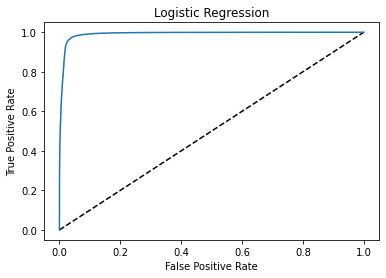


--------------------

Auc Score of Logistic Regression:

99.1492499199342

-------------------


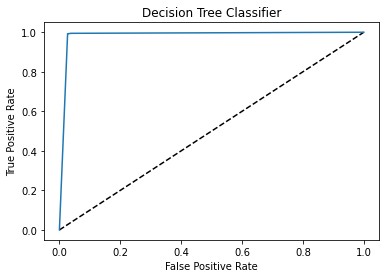


--------------------

Auc Score of Decision Tree Classifier:

98.3760920770696

-------------------


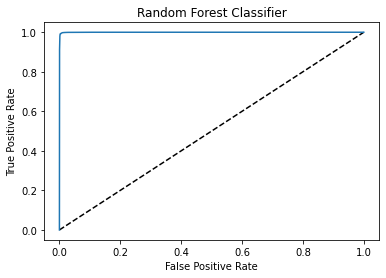


--------------------

Auc Score of Random Forest Classifier:

99.9667673480398

-------------------


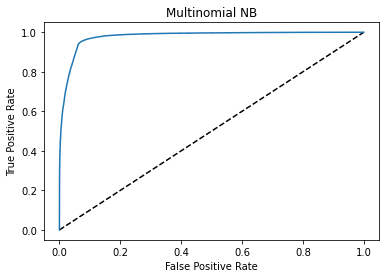


--------------------

Auc Score of Multinomial NB:

97.80293250813841

-------------------


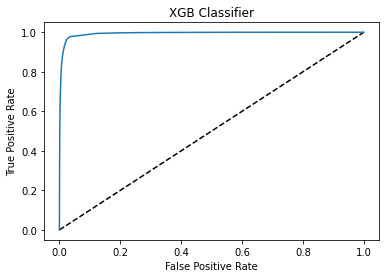


--------------------

Auc Score of XGB Classifier:

99.38257067141308

-------------------


In [206]:
for j, k in zip(model_name_rude,algo_name):
    
    y_pred_prob=j.predict_proba(x_test_rude)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test_rude,y_pred_prob)
    
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=k)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(k)
    plt.show()
    
    # Auc Score
    print('\n--------------------\n')
    print(f'Auc Score of {k}:\n')
    auc_score=roc_auc_score(y_test_rude,y_pred_prob)*100
    print(auc_score)
    print('\n-------------------')

# Hypertuning

In [207]:
# defining parameters for Random Forest


rfc_param={'n_estimators':list(range(50,400,50)),'max_depth' : np.arange(2,15),'criterion':['gini','entropy'],'max_features':['auto', 'sqrt', 'log2']}
rcv_rfc= RandomizedSearchCV(estimator=rfc_rude,param_distributions=rfc_param,scoring='accuracy',cv=5)

In [208]:
# Getting Best Parameters

rcv_rfc.fit(x_train_rude,y_train_rude)
rcv_rfc.best_params_

{'n_estimators': 250,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy'}

In [224]:
rfc1_rude=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',n_estimators=250)
rfc1_rude.fit(x_train_rude,y_train_rude)
rfc1_rude_pred=rfc1_rude.predict(x_test_rude)

print('Accuracy Score of the model is : \n',accuracy_score(y_test_rude,rfc1_rude_pred)*100,'\n')
print('Confusion Matrix is : \n',confusion_matrix(y_test_rude,rfc1_rude_pred),'\n')
print('Classification Report is : \n',classification_report(y_test_rude,rfc1_rude_pred),'\n')

Accuracy Score of the model is : 
 85.691942130117 

Confusion Matrix is : 
 [[38389 11639]
 [ 2632 47081]] 

Classification Report is : 
               precision    recall  f1-score   support

           0       0.94      0.77      0.84     50028
           1       0.80      0.95      0.87     49713

    accuracy                           0.86     99741
   macro avg       0.87      0.86      0.86     99741
weighted avg       0.87      0.86      0.86     99741
 



# Saving the Model

In [246]:
filename='comment_rude.pkl'
pickle.dump(rfc_rude,open(filename,'wb'))

# For Threat Comments

In [185]:
Y_threat=df1['threat']

# Balancing Dataset

In [186]:
x_threat_bal,y_threat_bal=smote.fit_resample(X,Y_threat)

In [187]:
y_threat_bal.value_counts()

0    159093
1    159093
Name: threat, dtype: int64

In [188]:
x_threat=x_threat_bal
y_threat=y_threat_bal

# Finding Best Random State


In [189]:
maxAccu=0
maxRs=0
for i in range(1,500):
    x_train_threat,x_test_threat,y_train_threat,y_test_threat=train_test_split(x_threat,y_threat,test_size=.33,random_state=i)
    mnb=MultinomialNB()
    mnb.fit(x_train_threat,y_train_threat)
    mnb_pred=mnb.predict(x_test_threat)
    acc=accuracy_score(y_test_threat,mnb_pred)*100
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best Accuracy Score is : ', maxAccu, ' when Random state is : ',maxRs)

Best Accuracy Score is :  97.82956515113997  when Random state is :  398


# Train Test Split

In [225]:
x_train_threat,x_test_threat,y_train_threat,y_test_threat=train_test_split(x_threat,y_threat,test_size=.33,random_state=398)

In [226]:
# Defining Model List
model_list=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),MultinomialNB(),XGBClassifier(verbosity=0)]

In [211]:
# Creating For loop to print Training and Test accuracy score
for m in model_list:
    model=m
    model.fit(x_train_threat,y_train_threat)
    model_pred_train=model.predict(x_train_threat)
    model_pred=model.predict(x_test_threat)
    print('Training Accuracy for the model ',m,' is: ',accuracy_score(y_train_threat,model_pred_train))
    print('Testing Accuracy for the model ',m,' is: ',accuracy_score(y_test_threat,model_pred))
    print('\n')

Training Accuracy for the model  LogisticRegression()  is:  0.9969697538276794
Testing Accuracy for the model  LogisticRegression()  is:  0.9966286356450353


Training Accuracy for the model  DecisionTreeClassifier()  is:  0.999699789852897
Testing Accuracy for the model  DecisionTreeClassifier()  is:  0.9946001028551837


Training Accuracy for the model  KNeighborsClassifier()  is:  0.9969134644250975
Testing Accuracy for the model  KNeighborsClassifier()  is:  0.9967143482981277


Training Accuracy for the model  RandomForestClassifier()  is:  0.999699789852897
Testing Accuracy for the model  RandomForestClassifier()  is:  0.9994476295689606


Training Accuracy for the model  GradientBoostingClassifier()  is:  0.9708092539777845
Testing Accuracy for the model  GradientBoostingClassifier()  is:  0.9701434258395079


Training Accuracy for the model  AdaBoostClassifier()  is:  0.9677790078054638
Testing Accuracy for the model  AdaBoostClassifier()  is:  0.9676291880154664


Training Acc

# Cross Validation

In [212]:
# Logistic Regression

lr_threat=LogisticRegression()
lr_threat.fit(x_train_threat,y_train_threat)
lr_threat_pred=lr_threat.predict(x_test_threat)
testing_accu=accuracy_score(y_test_threat,lr_threat_pred)*100
for k in range(3,7):
    cv_score=cross_val_score(lr_threat,x_threat,y_threat,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 3 the CV score is 99.64863318939237 and the accuracy for testing is 99.66286356450354 


At crossfold 4 the CV score is 99.6546046125615 and the accuracy for testing is 99.66286356450354 


At crossfold 5 the CV score is 99.66183299515346 and the accuracy for testing is 99.66286356450354 


At crossfold 6 the CV score is 99.66623295808112 and the accuracy for testing is 99.66286356450354 




In [214]:
# DecisionTreeClassifier

dtc_threat=DecisionTreeClassifier()
dtc_threat.fit(x_train_threat,y_train_threat)
dtc_threat_pred=dtc_threat.predict(x_test_threat)
testing_accu=accuracy_score(y_test_threat,dtc_threat_pred)*100
for k in range(3,7):
    cv_score=cross_val_score(dtc_threat,x_threat,y_threat,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 3 the CV score is 99.44875010214153 and the accuracy for testing is 99.44096302927564 


At crossfold 4 the CV score is 99.49903526614384 and the accuracy for testing is 99.44096302927564 


At crossfold 5 the CV score is 99.48960677319546 and the accuracy for testing is 99.44096302927564 


At crossfold 6 the CV score is 99.5075207582986 and the accuracy for testing is 99.44096302927564 




# Ensemble Method

In [215]:
# RandomForestClassifier

rfc_threat=RandomForestClassifier()
rfc_threat.fit(x_train_threat,y_train_threat)
rfc_threat_pred=rfc_threat.predict(x_test_threat)
testing_accu=accuracy_score(y_test_threat,rfc_threat_pred)*100
for k in range(3,7):
    cv_score=cross_val_score(rfc_threat,x_threat,y_threat,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 3 the CV score is 99.943429314929 and the accuracy for testing is 99.9457153197082 


At crossfold 4 the CV score is 99.94688650124354 and the accuracy for testing is 99.9457153197082 


At crossfold 5 the CV score is 99.94594371377922 and the accuracy for testing is 99.9457153197082 


At crossfold 6 the CV score is 99.94877210185238 and the accuracy for testing is 99.9457153197082 




# Naive Bayes

In [216]:
# MultinomialNB

mnb_threat=MultinomialNB()
mnb_threat.fit(x_train_threat,y_train_threat)
mnb_threat_pred=mnb_threat.predict(x_test_threat)
testing_accu=accuracy_score(y_test_threat,mnb_threat_pred)*100
for k in range(3,7):
    cv_score=cross_val_score(mnb_threat,x_threat,y_threat,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 3 the CV score is 97.69254461227081 and the accuracy for testing is 97.82956515113997 


At crossfold 4 the CV score is 97.71831576526101 and the accuracy for testing is 97.82956515113997 


At crossfold 5 the CV score is 97.73780122641546 and the accuracy for testing is 97.82956515113997 


At crossfold 6 the CV score is 97.74502963675334 and the accuracy for testing is 97.82956515113997 




# Extreme Gradient Boosting

In [217]:
# XGBClassifier

xgb_threat=XGBClassifier(verbosity=0)
xgb_threat.fit(x_train_threat,y_train_threat)
xgb_threat_pred=xgb_threat.predict(x_test_threat)
testing_accu=accuracy_score(y_test_threat,xgb_threat_pred)*100
for k in range(3,7):
    cv_score=cross_val_score(xgb_threat,x_threat,y_threat,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 3 the CV score is 99.65900448165537 and the accuracy for testing is 99.6904820860555 


At crossfold 4 the CV score is 99.67094735763982 and the accuracy for testing is 99.6904820860555 


At crossfold 5 the CV score is 99.67786163841208 and the accuracy for testing is 99.6904820860555 


At crossfold 6 the CV score is 99.6762899687604 and the accuracy for testing is 99.6904820860555 




Checking Classification Reports of Top 5 models

In [218]:
print('Classification Report for LR is : \n',classification_report(y_test_threat,lr_threat_pred),'\n')
print('---------------------------')
print('Classification Report for DTC is : \n',classification_report(y_test_threat,dtc_threat_pred),'\n')
print('---------------------------')
print('Classification Report for RFC is : \n',classification_report(y_test_threat,rfc_threat_pred),'\n')
print('---------------------------')
print('Classification Report for MNB is : \n',classification_report(y_test_threat,mnb_threat_pred),'\n')
print('---------------------------')
print('Classification Report for XGB is : \n',classification_report(y_test_threat,xgb_threat_pred),'\n')
print('---------------------------')

Classification Report for LR is : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     52451
           1       0.99      1.00      1.00     52551

    accuracy                           1.00    105002
   macro avg       1.00      1.00      1.00    105002
weighted avg       1.00      1.00      1.00    105002
 

---------------------------
Classification Report for DTC is : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     52451
           1       0.99      1.00      0.99     52551

    accuracy                           0.99    105002
   macro avg       0.99      0.99      0.99    105002
weighted avg       0.99      0.99      0.99    105002
 

---------------------------
Classification Report for RFC is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     52451
           1       1.00      1.00      1.00     52551

    accuracy

Checking confusion matrix of Top 5 models

In [219]:
print('Confusion Matrix for LR is : \n',confusion_matrix(y_test_threat,lr_threat_pred),'\n')
print('---------------------------')
print('Confusion Matrix for DTC is : \n',confusion_matrix(y_test_threat,dtc_threat_pred),'\n')
print('---------------------------')
print('Confusion Matrix for RFC is : \n',confusion_matrix(y_test_threat,rfc_threat_pred),'\n')
print('---------------------------')
print('Confusion Matrix for MNB is : \n',confusion_matrix(y_test_threat,mnb_threat_pred),'\n')
print('---------------------------')
print('Confusion Matrix for XGB is : \n',confusion_matrix(y_test_threat,xgb_threat_pred),'\n')
print('---------------------------')

Confusion Matrix for LR is : 
 [[52097   354]
 [    0 52551]] 

---------------------------
Confusion Matrix for DTC is : 
 [[51899   552]
 [   35 52516]] 

---------------------------
Confusion Matrix for RFC is : 
 [[52408    43]
 [   14 52537]] 

---------------------------
Confusion Matrix for MNB is : 
 [[50288  2163]
 [  116 52435]] 

---------------------------
Confusion Matrix for XGB is : 
 [[52190   261]
 [   64 52487]] 

---------------------------


# Plotting Auc Roc Curve

In [220]:
algo_name=['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Multinomial NB','XGB Classifier']
model_name_threat=[lr_threat,dtc_threat,rfc_threat,mnb_threat,xgb_threat]

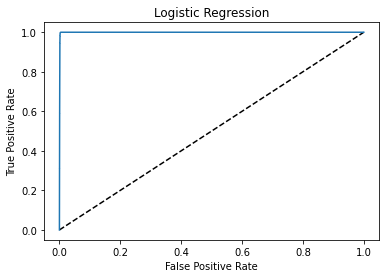


--------------------

Auc Score of Logistic Regression:

99.93055695890473

-------------------


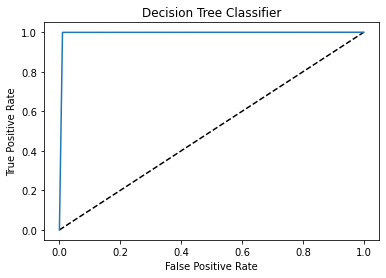


--------------------

Auc Score of Decision Tree Classifier:

99.46165223807128

-------------------


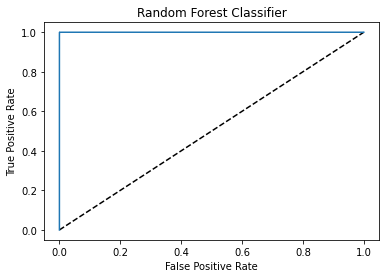


--------------------

Auc Score of Random Forest Classifier:

99.99757855717019

-------------------


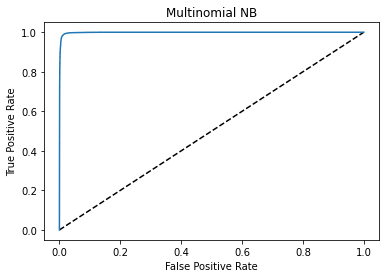


--------------------

Auc Score of Multinomial NB:

99.87192247730582

-------------------


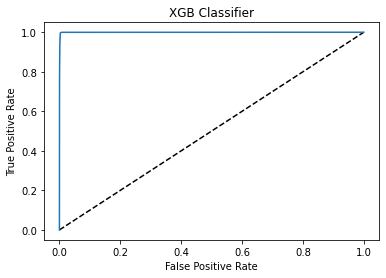


--------------------

Auc Score of XGB Classifier:

99.96594671764008

-------------------


In [221]:
for j, k in zip(model_name_threat,algo_name):
    
    y_pred_prob=j.predict_proba(x_test_threat)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test_threat,y_pred_prob)
    
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=k)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(k)
    plt.show()
    
    # Auc Score
    print('\n--------------------\n')
    print(f'Auc Score of {k}:\n')
    auc_score=roc_auc_score(y_test_threat,y_pred_prob)*100
    print(auc_score)
    print('\n-------------------')

# Hypertuning

In [222]:
# defining parameters for Random Forest


rfc_param={'n_estimators':list(range(50,400,50)),'max_depth' : np.arange(2,15),'criterion':['gini','entropy'],'max_features':['auto', 'sqrt', 'log2']}
rcv_rfc= RandomizedSearchCV(estimator=rfc_threat,param_distributions=rfc_param,scoring='accuracy',cv=5)

In [223]:
# Getting Best Parameters

rcv_rfc.fit(x_train_threat,y_train_threat)
rcv_rfc.best_params_

{'n_estimators': 250,
 'max_features': 'sqrt',
 'max_depth': 11,
 'criterion': 'gini'}

In [228]:
rfc1_threat=RandomForestClassifier(criterion='gini',max_depth=11,max_features='sqrt',n_estimators=250)
rfc1_threat.fit(x_train_threat,y_train_threat)
rfc1_threat_pred=rfc1_threat.predict(x_test_threat)

print('Accuracy Score of the model is : \n',accuracy_score(y_test_threat,rfc1_threat_pred)*100,'\n')
print('Confusion Matrix is : \n',confusion_matrix(y_test_threat,rfc1_threat_pred),'\n')
print('Classification Report is : \n',classification_report(y_test_threat,rfc1_threat_pred),'\n')

Accuracy Score of the model is : 
 95.99912382621282 

Confusion Matrix is : 
 [[51143  1308]
 [ 2893 49658]] 

Classification Report is : 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     52451
           1       0.97      0.94      0.96     52551

    accuracy                           0.96    105002
   macro avg       0.96      0.96      0.96    105002
weighted avg       0.96      0.96      0.96    105002
 



# Saving the Model

In [245]:
filename='comment_threat.pkl'
pickle.dump(rfc_threat,open(filename,'wb'))

# For Abuse Comments

In [190]:
Y_abuse=df1['abuse']

# Balancing Dataset

In [191]:
x_abuse_bal,y_abuse_bal=smote.fit_resample(X,Y_abuse)

In [192]:
y_abuse_bal.value_counts()

0    151694
1    151694
Name: abuse, dtype: int64

In [193]:
x_abuse = x_abuse_bal
y_abuse = y_abuse_bal

# Finding Best Random State

In [194]:
maxAccu=0
maxRs=0
for i in range(1,500):
    x_train_abuse,x_test_abuse,y_train_abuse,y_test_abuse=train_test_split(x_abuse,y_abuse,test_size=.33,random_state=i)
    mnb=MultinomialNB()
    mnb.fit(x_train_abuse,y_train_abuse)
    mnb_pred=mnb.predict(x_test_abuse)
    acc=accuracy_score(y_test_abuse,mnb_pred)*100
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best Accuracy Score is : ', maxAccu, ' when Random state is : ',maxRs)

Best Accuracy Score is :  94.57445639688771  when Random state is :  312


# Train Test Split

In [230]:
x_train_abuse,x_test_abuse,y_train_abuse,y_test_abuse=train_test_split(x_abuse,y_abuse,test_size=.33,random_state=312)

In [231]:
# Defining Model List
model_list=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),MultinomialNB(),XGBClassifier(verbosity=0)]

In [232]:
# Creating For loop to print Training and Test accuracy score
for m in model_list:
    model=m
    model.fit(x_train_abuse,y_train_abuse)
    model_pred_train=model.predict(x_train_abuse)
    model_pred=model.predict(x_test_abuse)
    print('Training Accuracy for the model ',m,' is: ',accuracy_score(y_train_abuse,model_pred_train))
    print('Testing Accuracy for the model ',m,' is: ',accuracy_score(y_test_abuse,model_pred))
    print('\n')

Training Accuracy for the model  LogisticRegression()  is:  0.9716287284337504
Testing Accuracy for the model  LogisticRegression()  is:  0.9641426702224353


Training Accuracy for the model  DecisionTreeClassifier()  is:  0.9995424781939204
Testing Accuracy for the model  DecisionTreeClassifier()  is:  0.973970974540297


Training Accuracy for the model  KNeighborsClassifier()  is:  0.5698803063920224
Testing Accuracy for the model  KNeighborsClassifier()  is:  0.5549595980782869


Training Accuracy for the model  RandomForestClassifier()  is:  0.9995424781939204
Testing Accuracy for the model  RandomForestClassifier()  is:  0.9918397107442144


Training Accuracy for the model  GradientBoostingClassifier()  is:  0.8982825713709419
Testing Accuracy for the model  GradientBoostingClassifier()  is:  0.8965930542654241


Training Accuracy for the model  AdaBoostClassifier()  is:  0.8987745303022103
Testing Accuracy for the model  AdaBoostClassifier()  is:  0.8976018537939852


Training Ac

# Cross Validation

In [233]:
# Logistic Regression
lr_abuse=LogisticRegression()
lr_abuse.fit(x_train_abuse,y_train_abuse)
lr_abuse_pred=lr_abuse.predict(x_test_abuse)
testing_accu=accuracy_score(y_test_abuse,lr_abuse_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(lr_abuse,x_abuse,y_abuse,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score is 96.15640697720411 and the accuracy for testing is 96.41526583365795 


At crossfold 3 the CV score is 96.40097937158396 and the accuracy for testing is 96.41526583365795 


At crossfold 4 the CV score is 96.49063245744723 and the accuracy for testing is 96.41526583365795 


At crossfold 5 the CV score is 96.54007488832363 and the accuracy for testing is 96.41526583365795 


At crossfold 6 the CV score is 96.57336559733957 and the accuracy for testing is 96.41526583365795 


At crossfold 7 the CV score is 96.5888583734925 and the accuracy for testing is 96.41526583365795 


At crossfold 8 the CV score is 96.59808710103859 and the accuracy for testing is 96.41526583365795 


At crossfold 9 the CV score is 96.61654533805478 and the accuracy for testing is 96.41526583365795 




In [235]:
# DecisionTreeClassifier
dtc_abuse=DecisionTreeClassifier()
dtc_abuse.fit(x_train_abuse,y_train_abuse)
dtc_abuse_pred=dtc_abuse.predict(x_test_abuse)
testing_accu=accuracy_score(y_test_abuse,dtc_abuse_pred)*100
for k in range(3,7):
    cv_score=cross_val_score(dtc_abuse,x_abuse,y_abuse,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 3 the CV score is 97.35685082490765 and the accuracy for testing is 97.40009388827295 


At crossfold 4 the CV score is 97.50715255712159 and the accuracy for testing is 97.40009388827295 


At crossfold 5 the CV score is 97.58560014234673 and the accuracy for testing is 97.40009388827295 


At crossfold 6 the CV score is 97.61988018501448 and the accuracy for testing is 97.40009388827295 




# Ensemble Method

In [238]:
# RandomForestClassifier
rfc_abuse=RandomForestClassifier()
rfc_abuse.fit(x_train_abuse,y_train_abuse)
rfc_abuse_pred=rfc_abuse.predict(x_test_abuse)
testing_accu=accuracy_score(y_test_abuse,rfc_abuse_pred)*100
for k in range(3,7):
    cv_score=cross_val_score(rfc_abuse,x_abuse,y_abuse,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 3 the CV score is 99.12653146210016 and the accuracy for testing is 99.19296037715118 


At crossfold 4 the CV score is 99.18553139873693 and the accuracy for testing is 99.19296037715118 


At crossfold 5 the CV score is 99.22475536955338 and the accuracy for testing is 99.19296037715118 


At crossfold 6 the CV score is 99.23167736523595 and the accuracy for testing is 99.19296037715118 




# Naive Bayes

In [236]:
# MultinomialNB

mnb_abuse=MultinomialNB()
mnb_abuse.fit(x_train_abuse,y_train_abuse)
mnb_abuse_pred=mnb_abuse.predict(x_test_abuse)
testing_accu=accuracy_score(y_test_abuse,mnb_abuse_pred)*100
for k in range(3,7):
    cv_score=cross_val_score(mnb_abuse,x_abuse,y_abuse,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 3 the CV score is 94.38507855363997 and the accuracy for testing is 94.57445639688771 


At crossfold 4 the CV score is 94.45330731604415 and the accuracy for testing is 94.57445639688771 


At crossfold 5 the CV score is 94.50703482030131 and the accuracy for testing is 94.57445639688771 


At crossfold 6 the CV score is 94.53076668526852 and the accuracy for testing is 94.57445639688771 




# Extreme Gradient Boosting

In [237]:
# XGBClassifier

xgb_abuse=XGBClassifier(verbosity=0)
xgb_abuse.fit(x_train_abuse,y_train_abuse)
xgb_abuse_pred=xgb_abuse.predict(x_test_abuse)
testing_accu=accuracy_score(y_test_abuse,xgb_abuse_pred)*100
for k in range(3,7):
    cv_score=cross_val_score(xgb_abuse,x_abuse,y_abuse,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 3 the CV score is 95.41610296387817 and the accuracy for testing is 95.41146036216902 


At crossfold 4 the CV score is 95.46916819386396 and the accuracy for testing is 95.41146036216902 


At crossfold 5 the CV score is 95.46587402575909 and the accuracy for testing is 95.41146036216902 


At crossfold 6 the CV score is 95.48828773712104 and the accuracy for testing is 95.41146036216902 




Checking Classification Reports of Top 5 models

In [239]:
print('Classification Report for LR is : \n',classification_report(y_test_abuse,lr_abuse_pred),'\n')
print('---------------------------')
print('Classification Report for DTC is : \n',classification_report(y_test_abuse,dtc_abuse_pred),'\n')
print('---------------------------')
print('Classification Report for RFC is : \n',classification_report(y_test_abuse,rfc_abuse_pred),'\n')
print('---------------------------')
print('Classification Report for MNB is : \n',classification_report(y_test_abuse,mnb_abuse_pred),'\n')
print('---------------------------')
print('Classification Report for XGB is : \n',classification_report(y_test_abuse,xgb_abuse_pred),'\n')
print('---------------------------')

Classification Report for LR is : 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96     50015
           1       0.95      0.98      0.96     50104

    accuracy                           0.96    100119
   macro avg       0.96      0.96      0.96    100119
weighted avg       0.96      0.96      0.96    100119
 

---------------------------
Classification Report for DTC is : 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97     50015
           1       0.96      0.99      0.97     50104

    accuracy                           0.97    100119
   macro avg       0.97      0.97      0.97    100119
weighted avg       0.97      0.97      0.97    100119
 

---------------------------
Classification Report for RFC is : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     50015
           1       0.99      1.00      0.99     50104

    accuracy

Checking Confusion Matrix of Top 5 models

In [240]:
print('Confusion Matrix for LR is : \n',confusion_matrix(y_test_abuse,lr_abuse_pred),'\n')
print('---------------------------')
print('Confusion Matrix for DTC is : \n',confusion_matrix(y_test_abuse,dtc_abuse_pred),'\n')
print('---------------------------')
print('Confusion Matrix for RFC is : \n',confusion_matrix(y_test_abuse,rfc_abuse_pred),'\n')
print('---------------------------')
print('Confusion Matrix for MNB is : \n',confusion_matrix(y_test_abuse,mnb_abuse_pred),'\n')
print('---------------------------')
print('Confusion Matrix for XGB is : \n',confusion_matrix(y_test_abuse,xgb_abuse_pred),'\n')
print('---------------------------')

Confusion Matrix for LR is : 
 [[47574  2441]
 [ 1148 48956]] 

---------------------------
Confusion Matrix for DTC is : 
 [[47981  2034]
 [  569 49535]] 

---------------------------
Confusion Matrix for RFC is : 
 [[49316   699]
 [  109 49995]] 

---------------------------
Confusion Matrix for MNB is : 
 [[46816  3199]
 [ 2233 47871]] 

---------------------------
Confusion Matrix for XGB is : 
 [[48592  1423]
 [ 3171 46933]] 

---------------------------


# Plotting Auc Roc Curve

In [241]:
algo_name=['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Multinomial NB','XGB Classifier']
model_name_abuse=[lr_abuse,dtc_abuse,rfc_abuse,mnb_abuse,xgb_abuse]

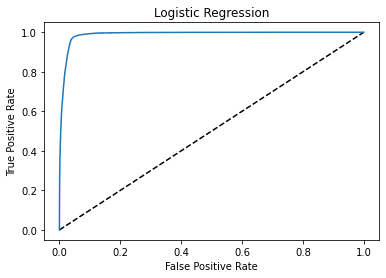


--------------------

Auc Score of Logistic Regression:

98.88140483449729

-------------------


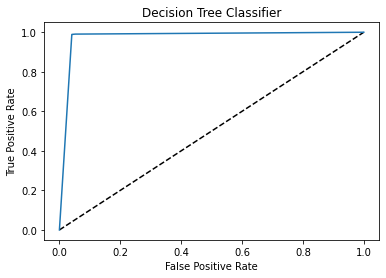


--------------------

Auc Score of Decision Tree Classifier:

97.48268158862577

-------------------


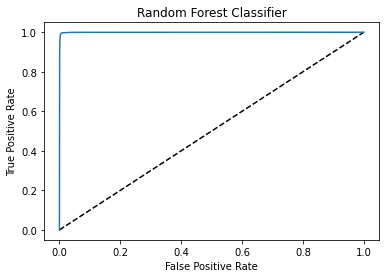


--------------------

Auc Score of Random Forest Classifier:

99.9502500758634

-------------------


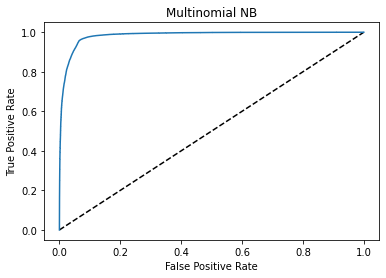


--------------------

Auc Score of Multinomial NB:

98.34288474833889

-------------------


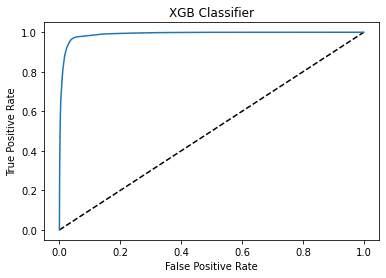


--------------------

Auc Score of XGB Classifier:

99.03689293579161

-------------------


In [242]:
for j, k in zip(model_name_abuse,algo_name):
    
    y_pred_prob=j.predict_proba(x_test_abuse)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test_abuse,y_pred_prob)
    
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=k)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(k)
    plt.show()
    
    # Auc Score
    print('\n--------------------\n')
    print(f'Auc Score of {k}:\n')
    auc_score=roc_auc_score(y_test_abuse,y_pred_prob)*100
    print(auc_score)
    print('\n-------------------')

# Hypertuning

In [243]:
# defining parameters for Random Forest


rfc_param={'n_estimators':list(range(50,400,50)),'max_depth' : np.arange(2,15),'criterion':['gini','entropy'],'max_features':['auto', 'sqrt', 'log2']}
rcv_rfc= RandomizedSearchCV(estimator=rfc_abuse,param_distributions=rfc_param,scoring='accuracy',cv=5)

In [ ]:
# Getting Best Parameters

rcv_rfc.fit(x_train_abuse,y_train_abuse)
rcv_rfc.best_params_

# Saving Model

In [244]:
filename='comment_abuse.pkl'
pickle.dump(rfc_abuse,open(filename,'wb'))

# For Loathe Comments

In [196]:
Y_loathe=df1['loathe']

# Balancing Dataset

In [197]:
x_loathe_bal,y_loathe_bal=smote.fit_resample(X,Y_loathe)

In [198]:
y_loathe_bal.value_counts()

0    158166
1    158166
Name: loathe, dtype: int64

In [199]:
x_loathe = x_loathe_bal
y_loathe = y_loathe_bal

# Finding Best Random State


In [200]:
maxAccu=0
maxRs=0
for i in range(1,500):
    x_train_loathe,x_test_loathe,y_train_loathe,y_test_loathe=train_test_split(x_loathe,y_loathe,test_size=.33,random_state=i)
    mnb=MultinomialNB()
    mnb.fit(x_train_loathe,y_train_loathe)
    mnb_pred=mnb.predict(x_test_loathe)
    acc=accuracy_score(y_test_loathe,mnb_pred)*100
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best Accuracy Score is : ', maxAccu, ' when Random state is : ',maxRs)

Best Accuracy Score is :  96.71999233643069  when Random state is :  68


# Train Test Split

In [307]:
x_train_loathe,x_test_loathe,y_train_loathe,y_test_loathe=train_test_split(x_loathe,y_loathe,test_size=.33,random_state=68)

In [308]:
# Defining Model List
model_list=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),MultinomialNB(),XGBClassifier(verbosity=0)]

In [ ]:
# Creating For loop to print Training and Test accuracy score
for m in model_list:
    model=m
    model.fit(x_train_loathe,y_train_loathe)
    model_pred_train=model.predict(x_train_loathe)
    model_pred=model.predict(x_test_loathe)
    print('Training Accuracy for the model ',m,' is: ',accuracy_score(y_train_loathe,model_pred_train))
    print('Testing Accuracy for the model ',m,' is: ',accuracy_score(y_test_loathe,model_pred))
    print('\n')

Training Accuracy for the model  LogisticRegression()  is:  0.9840616772513234
Testing Accuracy for the model  LogisticRegression()  is:  0.9791071941756874


Training Accuracy for the model  DecisionTreeClassifier()  is:  0.9997074671372357
Testing Accuracy for the model  DecisionTreeClassifier()  is:  0.9841172526104033




# Working on Test Dataset

In [247]:
df_test=pd.read_csv('malignant_test.csv')

# Overviewing Dataset

In [248]:
df_test.head(20)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


In [249]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [250]:
df_test.dtypes

id              object
comment_text    object
dtype: object

In [252]:
df_test.shape

(153164, 2)

# Preprocessing

In [253]:
# Making a copy
df2=df_test.copy()

In [254]:
# Converting to lower case
df2['comment_text']=df2['comment_text'].str.lower()

In [255]:
df2.head()

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule is more succesful then you'll...
1,0000247867823ef7,== from rfc == \n\n the title is fine as it is...
2,00013b17ad220c46,""" \n\n == sources == \n\n * zawe ashton on lap..."
3,00017563c3f7919a,":if you have a look back at the source, the in..."
4,00017695ad8997eb,i don't anonymously edit articles at all.


In [256]:
# Creating a column to get length of each comment
df2['uncl_length']=df2['comment_text'].str.len()

In [257]:
# Expanding Contracted words using Contractions Library

df2['comment_text'] = df2['comment_text'].apply(lambda x: [contractions.fix(word) for word in x.split()])

In [258]:
# Rejoining tokenized words to form string

df2['comment_text'] = [' '.join(map(str, text)) for text in df2['comment_text']]

In [259]:
# Replace email addresses with 'email'
df2['comment_text'] = df2['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
df2['comment_text'] = df2['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df2['comment_text'] = df2['comment_text'].str.replace(r'£|\$', 'currencysymb')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df2['comment_text'] = df2['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

# Replace numbers with 'numbr'
df2['comment_text'] = df2['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [260]:
# Removing Punctuation and other non-required characters if any

df2['comment_text']=df2['comment_text'].str.replace(r'[^\w\d\s]',' ')

In [261]:
# Removing Stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df2['comment_text'] = df2['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

# Lemmatization

In [262]:
# lemmatizing words
df2['comment_text'] = df2['comment_text'].apply(lambda x: ' '.join(lemma.lemmatize(word) for word in x.split()))

In [263]:
# Creating a column to get comment length after cleaning

df2['cleaned_length']=df2['comment_text'].str.len()

In [264]:
# Checking cleaned garbage text quantity

print(df2.uncl_length.sum())
print(df2.cleaned_length.sum())

print('************ \n')
print('Total Garbage Cleaned : ',df2.uncl_length.sum()-df2.cleaned_length.sum())
print('************ \n')
print('Total Garbage % : ',((df2.uncl_length.sum()-df2.cleaned_length.sum())/df2.uncl_length.sum())*100)

55886104
35598262
************ 

Total Garbage Cleaned :  20287842
************ 

Total Garbage % :  36.302122617099954


In [265]:
df2.head(20)

,id,comment_text,uncl_length,cleaned_length
0,00001cee341fdb12,yo bitch ja rule succesful ever hating sad mof...,367,221
1,0000247867823ef7,rfc title fine I going,50,22
2,00013b17ad220c46,source zawe ashton lapland,54,26
3,00017563c3f7919a,look back source information updated correct f...,205,109
4,00017695ad8997eb,anonymously edit article,41,24
5,0001ea8717f6de06,thank understanding think highly would revert ...,96,64
6,00024115d4cbde0f,please add nonsense wikipedia edits considered...,176,126
7,000247e83dcc1211,dear god site horrible,32,22
8,00025358d4737918,fool believe number correct number lie numbr n...,556,372
9,00026d1092fe71cc,double redirects fixing double redirects blank...,224,139


In [ ]:
# Checking Top words

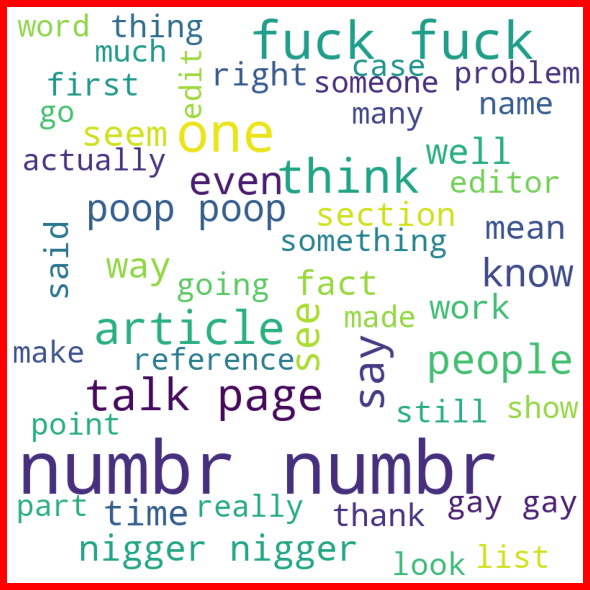

In [266]:
df2_com=df2['comment_text']

wc_df2= WordCloud(width = 800, height = 800,
                background_color ='white',
               max_words=50,
                min_font_size = 10).generate(' '.join(df2_com))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(wc_df2)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Vectorization

In [286]:
vectorizer=TfidfVectorizer(max_features=170022)

features_test=vectorizer.fit_transform(df2['comment_text'])
X_test=features_test


# Load Model


In [289]:
model_malig= pickle.load(open('comment_malignant.pkl','rb'))
model_hmalig= pickle.load(open('comment_higlymalignant.pkl','rb'))
model_rude= pickle.load(open('comment_rude.pkl','rb'))
model_threat= pickle.load(open('comment_threat.pkl','rb'))
model_abuse= pickle.load(open('comment_abuse.pkl','rb'))


Making Prediction

In [ ]:
predict_malig=model_malig.predict(X_test)
predict_hmalig = model_hmalig.predict(X_test)
predict_rude = model_rude.predict(X_test)
predict_threat = model_threat.predict(X_test)
predict_abuse = model_abuse.predict(X_test)

In [291]:
predictions = pd.DataFrame(list(zip(predict_malig,predict_hmalig,predict_rude,predict_threat,predict_abuse)),columns=['malignant','highly_malignant','rude','threat','abuse'])

In [298]:
predictions1= df2['comment_text'].copy()

In [300]:
comment=[]
for x in df2.comment_text:
    comment.append(x)

In [302]:
predictions1 = pd.DataFrame(list(zip(comment,predict_malig,predict_hmalig,predict_rude,predict_threat,predict_abuse)),columns=['comments','malignant','highly_malignant','rude','threat','abuse'])

In [303]:
predictions1.head(20)

,comments,malignant,highly_malignant,rude,threat,abuse
0,yo bitch ja rule succesful ever hating sad mof...,1,0,1,0,0
1,rfc title fine I going,1,0,1,0,0
2,source zawe ashton lapland,1,0,1,0,0
3,look back source information updated correct f...,1,0,1,0,0
4,anonymously edit article,1,0,1,0,0
5,thank understanding think highly would revert ...,0,0,1,0,0
6,please add nonsense wikipedia edits considered...,0,0,1,0,0
7,dear god site horrible,1,0,1,0,0
8,fool believe number correct number lie numbr n...,1,0,1,0,0
9,double redirects fixing double redirects blank...,1,0,1,0,0
